# MULTIMODAL POPULARITY PREDICTION FOR BEAUTY BRANDS - LAKME, LOREAL & MAYBELLINE

Implemented a machine learning based model that can predict popularity of a post using images posted and its associated number of likes, comments and other features.Later build a comparison between the three classes (Lakme, Loreal and Maybelline) to identify which brand outcast the others.

# Import Required Libraries

In [1]:
#import all the required libraries
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import numpy as np
import math
import random
import collections
import timeit
import xgboost as xgb
import sklearn.metrics
# Model Libraries
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor

Defining the path where the scraped data is placed

In [2]:
original_folder = r'C:\Users\Sharoz\Downloads\Dataset\Main Dataset'

# Separating the Json, Images and Text files and renaming it by order

Following step has been performed to achieve the below.

    1) Followed a case statement - If the Image file is present move its associated JSON and text into their respective folder, separating the files by its type.
    2) While moving the files, rename each of them such that the file_name has a delimeter "_", in which the 1st part represents the "Img_ID", second character represents the "Label" and third and final part represents the filename.
    3) With above steps performed, the image file and its respective json and text file will have the same img_id, label and filename, only the extension will be different. 

Hence can be used later for merging

In [3]:
def listDir_files(dir):
    image_ids = []
    comment_counts = []
    like_counts = []
    followers_count =[]
    heights = []
    widths = []
    follows = []
    reel_counts = []
    blocked_by_viewers =[]
    filenames= os.listdir(dir)
    #get the brand folder (Lakme, Loreal and Maybelline) from directory
    for filename in filenames:
        #print(filename)
        #print('Folder_path:' +os.path.abspath(os.path.join(dir,filename)), sep='\n')
        path = os.path.abspath(os.path.join(dir,filename))
        i=0
        #print(filename)
        print(path)
        mean_f =0
        mean_r = 0
        #get all the files from each brand folder and segregate it based on filetype
        for files in  os.listdir(path):
            filename_extension = files.split('.')[-1]
            print(filename_extension)
            file_name = files.split('.')[0]
            json_file_name = file_name + ".json"
            text_file_name = file_name + ".txt"
            #print(json_file_name)
            #print(files)
            #Move only those JSON or text file whose jpg file exist
            if filename_extension == 'jpg' and filename == 'Lakme':
                i=i+1
                src_path = os.path.join(path, files)
                print(src_path)
                dst_path = r'C:\Users\Sharoz\Downloads\Dataset\Labelled_data\Images\Lakme'
                new_filename = str(i)  + "_" +  "1_" + files
                new_dst_path = os.path.join(dst_path, str(i) +"_"+ "1_" + files)
                print(new_dst_path)
                #dst_files = str(i) +"_"+ files
                shutil.move(src_path, new_dst_path)
                try:
                    #json_filename = file_name + ".json"
                    json_src_path = os.path.abspath(os.path.join(path,json_file_name))
                    print(json_src_path)
                    json_dst_path = r'C:\Users\Sharoz\Downloads\Dataset\Labelled_data\Json\Lakme'
                    new_json_filename =   str(i) +"_"+ "1_" + json_file_name
                    new_json_dst_path = os.path.join(json_dst_path,new_json_filename)
                    print(new_json_dst_path)
                    shutil.move(json_src_path, new_json_dst_path) 
                except KeyError: # handling the case where the token is not in vocabulary
                    continue
                except:
                    continue
                try:
                    #json_filename = file_name + ".json"
                    text_src_path = os.path.abspath(os.path.join(path,text_file_name))
                    print(json_src_path)
                    text_dst_path = r'C:\Users\Sharoz\Downloads\Dataset\Labelled_data\Text\Lakme'
                    new_text_filename = str(i) +"_"+ "1_" + text_file_name
                    new_text_dst_path = os.path.join(text_dst_path,new_text_filename)
                    print(new_text_dst_path)
                    shutil.move(text_src_path, new_text_dst_path) 
                except KeyError: # handling the case where the token is not in vocabulary
                    continue
                except:
                    continue
                
            #Move only those JSON or text file whose jpg file exist
            if filename_extension == 'jpg' and filename == 'Loreal':
                i=i+1
                src_path = os.path.join(path, files)
                print(src_path)
                dst_path = r'C:\Users\Sharoz\Downloads\Dataset\Labelled_data\Images\Loreal'
                new_filename =  str(i) +"_"+ "0_" +files
                new_dst_path = os.path.join(dst_path,  str(i) +"_"+ "0_" +files)
                print(new_dst_path)
                #dst_files = str(i) +"_"+ files
                shutil.move(src_path, new_dst_path)
                try:
                    #json_filename = file_name + ".json"
                    json_src_path = os.path.abspath(os.path.join(path,json_file_name))
                    print(json_src_path)
                    json_dst_path = r'C:\Users\Sharoz\Downloads\Dataset\Labelled_data\Json\Loreal'
                    new_json_filename = str(i) +"_"+ "0_" + json_file_name
                    new_json_dst_path = os.path.join(json_dst_path,new_json_filename)
                    print(new_json_dst_path)
                    shutil.move(json_src_path, new_json_dst_path) 
                except KeyError: # handling the case where the token is not in vocabulary
                    continue
                except:
                    continue
                try:
                    #json_filename = file_name + ".json"
                    text_src_path = os.path.abspath(os.path.join(path,text_file_name))
                    print(json_src_path)
                    text_dst_path = r'C:\Users\Sharoz\Downloads\Dataset\Labelled_data\Text\Loreal'
                    new_text_filename =  str(i) +"_"+ "0_" + text_file_name
                    new_text_dst_path = os.path.join(text_dst_path,new_text_filename)
                    print(new_text_dst_path)
                    shutil.move(text_src_path, new_text_dst_path) 
                except KeyError: # handling the case where the token is not in vocabulary
                    continue
                except:
                    continue
                
               
            #Move only those JSON or text file whose jpg file exist    
            if filename_extension == 'jpg' and filename == 'Maybelline':
                i=i+1
                src_path = os.path.join(path, files)
                print(src_path)
                dst_path = r'C:\Users\Sharoz\Downloads\Dataset\Labelled_data\Images\Maybelline'
                new_filename = str(i) +"_"+ "2_" +files
                new_dst_path = os.path.join(dst_path,str(i) +"_"+ "2_" +files)
                print(new_dst_path)
                #dst_files = str(i) +"_"+ files
                shutil.move(src_path, new_dst_path)
                try:
                    #json_filename = file_name + ".json"
                    json_src_path = os.path.abspath(os.path.join(path,json_file_name))
                    print(json_src_path)
                    json_dst_path = r'C:\Users\Sharoz\Downloads\Dataset\Labelled_data\Json\Maybelline'
                    new_json_filename =   str(i) +"_"+ "2_" +json_file_name
                    new_json_dst_path = os.path.join(json_dst_path,new_json_filename)
                    print(new_json_dst_path)
                    shutil.move(json_src_path, new_json_dst_path) 
                except KeyError: # handling the case where the token is not in vocabulary
                    continue
                except:
                    continue
                try:
                    #json_filename = file_name + ".json"
                    text_src_path = os.path.abspath(os.path.join(path,text_file_name))
                    print(text_src_path)
                    text_dst_path = r'C:\Users\Sharoz\Downloads\Dataset\Labelled_data\Text\Maybelline'
                    new_text_filename =  str(i) +"_"+ "2_" + text_file_name
                    new_text_dst_path = os.path.join(text_dst_path,new_text_filename)
                    print(new_text_dst_path)
                    shutil.move(text_src_path, new_text_dst_path) 
                except KeyError: # handling the case where the token is not in vocabulary
                    continue
                except:
                    continue
                
                
                
        

In [4]:
df_files = listDir_files(original_folder)

# Splitting Images into test and train folder

Declaring the path variables for original and split folders

In [5]:
original_folder = r'C:\Users\Sharoz\Downloads\Dataset\Labelled_data\Images'
split_folder = r'C:\Users\Sharoz\Downloads\Dataset\Labelled_data\split_images'

Splitting the entire Dataset into train and test, such that 80% contitues to Train and 20% as Test

In [6]:
import splitfolders
#splitting the folder such that 80% is training and 20% is testing or validation
splitfolders.ratio(original_folder, output=split_folder,
   ratio=(.8, .2))

Declaring the path variables for train and test folder

In [7]:
#Declaration of directory pat
train_folder = r'C:\Users\Sharoz\Downloads\Dataset\Labelled_data\split_images\train'
test_folder = r'C:\Users\Sharoz\Downloads\Dataset\Labelled_data\split_images\test'
#val_folder = r'C:\Users\Sharoz\Downloads\Dataset\Loreal\Images\split\val'

In [8]:
#import the required libraries
%matplotlib inline
import PIL
from PIL import Image
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops
from skimage.filters import gabor
import numpy as np
import pickle
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [9]:
#size of train and test dataset
#print('No of samples in train set:' +str(len(train_folder)))
#print('No of samples in test set:' +str(len(test_folder)))

# Creating an array of images with Label/Class

# TRAINING DATASET

Converting the images into an array with classes(Loreal, Lakme and Maybelline). In Addition getting the Img_id out of the name of the file into a list variable for training dataset.

In [10]:
#create a list with member as the brand name which refers to class
categories = ["Loreal", "Lakme", "Maybelline"]
training_data = []
img_id_train = []
#create an array with training dataset of images and numrical label
def create_dataset_PIL(img_folder):#function to create an array
    for category in categories:
        path = os.path.join(img_folder,category) #join the folder with the file name
        class_num  = categories.index(category)
        for img in os.listdir(path): #for images in each class folders
            print(img)
            img_array= cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            #new_array= cv2.resize 
            img_ids = img.split('_')[0:1] #split the filename on the basis of delimiter '_'
            img_id_train.append(img_ids) #append the img_ids
    
            training_data.append([img_array, class_num])
    print(img_id_train)
    
create_dataset_PIL(train_folder)

1001_0_2022-04-26_15-00-09_UTC.jpg
1002_0_2022-04-26_16-06-04_UTC.jpg
1003_0_2022-04-27_08-00-24_UTC.jpg
1004_0_2022-04-27_11-00-23_UTC.jpg
1006_0_2022-04-27_16-00-26_UTC.jpg
1007_0_2022-04-28_08-00-12_UTC.jpg
1008_0_2022-04-28_11-00-09_UTC.jpg
1009_0_2022-04-28_15-06-09_UTC.jpg
100_0_2021-01-02_16-58-45_UTC.jpg
1010_0_2022-04-28_16-00-14_UTC.jpg
1011_0_2022-04-28_16-51-19_UTC.jpg
1012_0_2022-04-29_08-18-29_UTC.jpg
1014_0_2022-04-29_15-00-13_UTC.jpg
1015_0_2022-04-29_16-03-19_UTC.jpg
1016_0_2022-04-30_08-00-09_UTC.jpg
1017_0_2022-04-30_08-01-15_UTC.jpg
1018_0_2022-04-30_11-00-11_UTC.jpg
1019_0_2022-04-30_12-02-34_UTC.jpg
101_0_2021-01-03_16-58-48_UTC.jpg
1020_0_2022-04-30_15-07-01_UTC.jpg
1021_0_2022-04-30_16-17-35_UTC.jpg
1022_0_2022-05-01_08-00-13_UTC_1.jpg
1025_0_2022-05-01_11-00-10_UTC.jpg
1026_0_2022-05-01_15-00-09_UTC.jpg
1027_0_2022-05-01_16-00-12_UTC_1.jpg
1028_0_2022-05-01_16-00-12_UTC_2.jpg
1030_0_2022-05-02_08-04-56_UTC.jpg
1031_0_2022-05-02_11-00-12_UTC.jpg
1034_0_2022-05-0

1257_0_2022-06-05_08-57-35_UTC_1.jpg
1259_0_2022-06-05_08-57-35_UTC_3.jpg
125_0_2021-01-27_16-59-08_UTC.jpg
1260_0_2022-06-05_08-57-35_UTC_4.jpg
1261_0_2022-06-05_09-06-50_UTC_1.jpg
1262_0_2022-06-05_09-06-50_UTC_2.jpg
1263_0_2022-06-05_09-06-50_UTC_3.jpg
1264_0_2022-06-05_09-08-39_UTC_1.jpg
1265_0_2022-06-05_09-08-39_UTC_2.jpg
1266_0_2022-06-05_09-11-02_UTC_1.jpg
1268_0_2022-06-05_09-11-02_UTC_3.jpg
1269_0_2022-06-05_10-05-47_UTC.jpg
126_0_2021-01-28_16-59-04_UTC.jpg
1270_0_2022-06-05_11-33-58_UTC.jpg
1271_0_2022-06-05_15-00-10_UTC_1.jpg
1272_0_2022-06-05_15-00-10_UTC_2.jpg
1273_0_2022-06-05_15-00-10_UTC_3.jpg
1276_0_2022-06-05_16-00-12_UTC.jpg
1277_0_2022-06-05_18-23-52_UTC.jpg
1279_0_2022-06-06_10-00-14_UTC.jpg
127_0_2021-01-29_16-59-02_UTC.jpg
1280_0_2022-06-06_12-00-07_UTC.jpg
1281_0_2022-06-06_14-55-04_UTC.jpg
1283_0_2022-06-06_17-00-09_UTC.jpg
1284_0_2022-06-06_19-00-17_UTC.jpg
1285_0_2022-06-07_08-48-11_UTC.jpg
1286_0_2022-06-07_10-55-11_UTC.jpg
1287_0_2022-06-07_15-00-09_UTC.j

211_0_2021-06-15_16-02-27_UTC_3.jpg
212_0_2021-06-16_15-58-51_UTC.jpg
214_0_2021-06-17_15-59-33_UTC_2.jpg
215_0_2021-06-17_15-59-33_UTC_3.jpg
216_0_2021-06-18_15-59-21_UTC.jpg
219_0_2021-06-23_15-59-08_UTC.jpg
21_0_2020-10-30_16-59-10_UTC.jpg
220_0_2021-06-26_15-59-20_UTC.jpg
221_0_2021-06-29_15-58-55_UTC.jpg
222_0_2021-07-02_15-58-52_UTC.jpg
223_0_2021-07-05_17-18-35_UTC.jpg
224_0_2021-07-08_16-29-25_UTC.jpg
225_0_2021-07-11_16-00-23_UTC.jpg
226_0_2021-07-14_16-00-20_UTC.jpg
227_0_2021-07-16_07-03-18_UTC_profile_pic.jpg
228_0_2021-07-17_16-00-20_UTC.jpg
229_0_2021-07-19_18-52-08_UTC.jpg
22_0_2020-10-31_16-59-12_UTC.jpg
230_0_2021-07-20_14-48-28_UTC.jpg
231_0_2021-07-20_16-00-16_UTC.jpg
232_0_2021-07-20_16-00-43_UTC.jpg
233_0_2021-07-20_19-00-18_UTC.jpg
235_0_2021-07-21_19-06-56_UTC.jpg
236_0_2021-07-22_15-00-15_UTC.jpg
237_0_2021-07-23_15-00-16_UTC.jpg
238_0_2021-07-23_16-00-16_UTC.jpg
239_0_2021-07-24_19-10-09_UTC.jpg
241_0_2021-07-26_15-00-15_UTC.jpg
242_0_2021-07-26_16-00-22_UTC.jp

483_0_2021-11-07_17-00-18_UTC.jpg
484_0_2021-11-08_16-00-18_UTC.jpg
485_0_2021-11-08_17-00-39_UTC.jpg
487_0_2021-11-09_17-00-24_UTC.jpg
488_0_2021-11-10_16-01-50_UTC_1.jpg
489_0_2021-11-10_16-01-50_UTC_2.jpg
48_0_2020-11-26_16-59-24_UTC.jpg
490_0_2021-11-10_17-00-16_UTC.jpg
491_0_2021-11-11_17-00-21_UTC.jpg
492_0_2021-11-11_18-03-27_UTC_1.jpg
493_0_2021-11-11_18-03-27_UTC_2.jpg
494_0_2021-11-12_16-00-16_UTC.jpg
496_0_2021-11-13_17-00-23_UTC.jpg
497_0_2021-11-14_00-18-56_UTC_1.jpg
498_0_2021-11-14_00-18-56_UTC_2.jpg
499_0_2021-11-14_00-18-56_UTC_3.jpg
501_0_2021-11-15_13-02-06_UTC.jpg
502_0_2021-11-15_17-00-21_UTC.jpg
503_0_2021-11-15_18-15-29_UTC_1.jpg
504_0_2021-11-15_18-15-29_UTC_2.jpg
505_0_2021-11-15_18-15-29_UTC_3.jpg
506_0_2021-11-15_18-15-29_UTC_4.jpg
508_0_2021-11-15_18-15-29_UTC_6.jpg
509_0_2021-11-15_18-15-29_UTC_7.jpg
50_0_2020-11-28_16-59-04_UTC.jpg
510_0_2021-11-15_18-15-29_UTC_8.jpg
511_0_2021-11-15_18-15-29_UTC_9.jpg
512_0_2021-11-16_17-00-18_UTC.jpg
513_0_2021-11-16_17-

746_0_2022-02-21_17-00-12_UTC.jpg
747_0_2022-02-21_17-10-33_UTC.jpg
748_0_2022-02-22_14-51-17_UTC.jpg
749_0_2022-02-23_16-00-12_UTC.jpg
74_0_2020-12-14_17-16-53_UTC_1.jpg
750_0_2022-02-24_16-00-11_UTC.jpg
751_0_2022-02-24_17-00-10_UTC.jpg
752_0_2022-02-25_16-06-02_UTC.jpg
754_0_2022-02-26_17-06-22_UTC.jpg
755_0_2022-02-27_16-00-43_UTC.jpg
756_0_2022-02-27_17-00-18_UTC.jpg
757_0_2022-02-28_16-00-13_UTC.jpg
75_0_2020-12-14_17-16-53_UTC_2.jpg
761_0_2022-03-03_17-49-23_UTC.jpg
762_0_2022-03-04_16-00-12_UTC.jpg
763_0_2022-03-05_16-15-30_UTC_1.jpg
764_0_2022-03-05_16-15-30_UTC_2.jpg
766_0_2022-03-05_16-15-30_UTC_4.jpg
768_0_2022-03-05_16-15-30_UTC_6.jpg
76_0_2020-12-15_17-05-52_UTC.jpg
770_0_2022-03-05_16-15-30_UTC_8.jpg
771_0_2022-03-05_16-15-30_UTC_9.jpg
772_0_2022-03-05_17-00-14_UTC.jpg
773_0_2022-03-06_16-00-26_UTC.jpg
774_0_2022-03-07_13-02-52_UTC_1.jpg
775_0_2022-03-07_13-02-52_UTC_2.jpg
776_0_2022-03-07_13-02-52_UTC_3.jpg
777_0_2022-03-07_17-00-17_UTC.jpg
778_0_2022-03-09_10-02-16_UTC

1028_1_2022-07-01_06-32-24_UTC_7.jpg
1030_1_2022-07-01_12-18-52_UTC.jpg
1031_1_2022-07-01_13-32-07_UTC.jpg
1034_1_2022-07-02_10-18-11_UTC.jpg
1035_1_2022-07-02_10-32-12_UTC.jpg
1036_1_2022-07-02_11-18-17_UTC.jpg
1037_1_2022-07-02_11-27-31_UTC.jpg
1038_1_2022-07-02_14-31-09_UTC_1.jpg
103_1_2021-09-20_10-30-03_UTC.jpg
1040_1_2022-07-02_14-31-09_UTC_3.jpg
1041_1_2022-07-02_14-31-09_UTC_4.jpg
1042_1_2022-07-02_14-31-09_UTC_5.jpg
1043_1_2022-07-02_14-31-09_UTC_6.jpg
1044_1_2022-07-03_08-29-17_UTC.jpg
1045_1_2022-07-03_11-04-59_UTC.jpg
1048_1_2022-07-03_11-30-47_UTC_3.jpg
1049_1_2022-07-03_11-30-47_UTC_4.jpg
104_1_2021-09-20_13-03-03_UTC_1.jpg
1050_1_2022-07-03_11-30-47_UTC_5.jpg
1052_1_2022-07-03_16-34-27_UTC.jpg
1053_1_2022-07-04_09-30-29_UTC_1.jpg
1054_1_2022-07-04_09-30-29_UTC_2.jpg
1055_1_2022-07-04_09-30-29_UTC_3.jpg
1057_1_2022-07-04_09-30-29_UTC_5.jpg
1058_1_2022-07-04_09-30-29_UTC_6.jpg
1059_1_2022-07-04_11-32-28_UTC.jpg
105_1_2021-09-20_13-03-03_UTC_2.jpg
1060_1_2022-07-04_11-49-50

1286_1_2022-08-08_06-34-24_UTC_10.jpg
1287_1_2022-08-08_06-34-24_UTC_2.jpg
128_1_2021-09-24_13-34-05_UTC.jpg
1291_1_2022-08-08_06-34-24_UTC_6.jpg
1293_1_2022-08-08_06-34-24_UTC_8.jpg
1297_1_2022-08-08_13-29-27_UTC.jpg
1298_1_2022-08-08_13-39-04_UTC.jpg
1299_1_2022-08-08_13-51-36_UTC.jpg
129_1_2021-09-24_13-50-36_UTC.jpg
1300_1_2022-08-08_14-44-20_UTC.jpg
1301_1_2022-08-09_06-48-40_UTC.jpg
1302_1_2022-08-09_07-49-55_UTC.jpg
1303_1_2022-08-09_09-16-43_UTC.jpg
1304_1_2022-08-09_09-18-10_UTC.jpg
1305_1_2022-08-09_09-49-49_UTC.jpg
1307_1_2022-08-09_10-13-23_UTC.jpg
1308_1_2022-08-09_10-47-52_UTC.jpg
1309_1_2022-08-09_10-58-37_UTC.jpg
130_1_2021-09-25_06-31-00_UTC.jpg
1310_1_2022-08-09_11-03-02_UTC.jpg
1311_1_2022-08-09_11-30-48_UTC.jpg
1312_1_2022-08-09_11-34-33_UTC.jpg
1315_1_2022-08-09_12-11-31_UTC.jpg
1317_1_2022-08-09_12-13-30_UTC.jpg
1318_1_2022-08-09_12-25-08_UTC.jpg
1319_1_2022-08-09_13-14-47_UTC.jpg
131_1_2021-09-25_10-28-25_UTC.jpg
1321_1_2022-08-09_13-31-24_UTC_1.jpg
1322_1_2022-0

350_1_2021-11-23_08-30-59_UTC_1.jpg
352_1_2021-11-23_08-30-59_UTC_3.jpg
353_1_2021-11-23_10-30-32_UTC_1.jpg
354_1_2021-11-23_10-30-32_UTC_2.jpg
355_1_2021-11-23_10-30-32_UTC_3.jpg
356_1_2021-11-23_12-30-52_UTC_1.jpg
357_1_2021-11-23_12-30-52_UTC_2.jpg
358_1_2021-11-23_12-30-52_UTC_3.jpg
35_1_2021-07-25_07-17-41_UTC.jpg
360_1_2021-11-24_06-30-25_UTC.jpg
364_1_2021-11-24_08-29-41_UTC_3.jpg
365_1_2021-11-24_12-34-55_UTC.jpg
366_1_2021-11-25_06-30-31_UTC_1.jpg
367_1_2021-11-25_06-30-31_UTC_2.jpg
368_1_2021-11-25_09-01-04_UTC.jpg
36_1_2021-07-29_21-54-34_UTC.jpg
370_1_2021-11-25_12-20-11_UTC.jpg
371_1_2021-11-25_12-20-26_UTC.jpg
373_1_2021-11-25_12-20-56_UTC.jpg
376_1_2021-11-25_12-21-46_UTC.jpg
378_1_2021-11-25_13-04-38_UTC.jpg
37_1_2021-08-02_09-00-01_UTC.jpg
380_1_2021-11-25_19-44-15_UTC.jpg
381_1_2021-11-26_07-30-44_UTC_1.jpg
382_1_2021-11-26_07-30-44_UTC_2.jpg
383_1_2021-11-27_14-37-54_UTC.jpg
384_1_2021-11-27_15-04-12_UTC.jpg
385_1_2021-11-28_06-30-19_UTC_1.jpg
386_1_2021-11-28_06-30-

625_1_2022-02-23_12-34-08_UTC.jpg
626_1_2022-02-23_12-35-53_UTC.jpg
627_1_2022-02-24_08-47-39_UTC.jpg
628_1_2022-02-24_10-35-04_UTC.jpg
629_1_2022-02-24_12-22-21_UTC_1.jpg
630_1_2022-02-24_12-22-21_UTC_2.jpg
631_1_2022-02-24_12-22-21_UTC_3.jpg
632_1_2022-02-24_13-50-55_UTC.jpg
633_1_2022-02-25_07-22-02_UTC.jpg
634_1_2022-02-25_07-24-25_UTC.jpg
636_1_2022-02-25_08-30-07_UTC_2.jpg
637_1_2022-02-25_08-30-07_UTC_3.jpg
638_1_2022-02-25_12-05-24_UTC_1.jpg
640_1_2022-02-26_04-33-00_UTC.jpg
641_1_2022-02-26_06-30-05_UTC_1.jpg
642_1_2022-02-26_06-30-05_UTC_2.jpg
643_1_2022-02-26_08-30-05_UTC.jpg
644_1_2022-02-27_04-42-00_UTC_1.jpg
648_1_2022-02-27_08-30-09_UTC_2.jpg
649_1_2022-02-28_07-45-08_UTC.jpg
64_1_2021-08-23_19-26-34_UTC.jpg
650_1_2022-02-28_09-45-08_UTC_1.jpg
651_1_2022-02-28_09-45-08_UTC_2.jpg
652_1_2022-02-28_14-40-12_UTC.jpg
653_1_2022-03-01_04-30-04_UTC_1.jpg
654_1_2022-03-01_04-30-04_UTC_2.jpg
656_1_2022-03-02_11-23-17_UTC_1.jpg
657_1_2022-03-02_11-23-17_UTC_2.jpg
658_1_2022-03-02_

88_1_2021-09-15_13-26-07_UTC.jpg
890_1_2022-05-16_10-30-38_UTC.jpg
891_1_2022-05-16_12-30-47_UTC.jpg
893_1_2022-05-17_11-26-11_UTC.jpg
894_1_2022-05-17_18-05-46_UTC.jpg
895_1_2022-05-18_09-40-39_UTC.jpg
896_1_2022-05-18_10-31-04_UTC.jpg
898_1_2022-05-19_16-02-48_UTC.jpg
899_1_2022-05-20_10-30-16_UTC.jpg
89_1_2021-09-16_08-29-23_UTC.jpg
8_1_2021-07-01_07-42-47_UTC.jpg
900_1_2022-05-21_10-30-19_UTC.jpg
901_1_2022-05-22_10-30-36_UTC.jpg
902_1_2022-05-23_10-31-01_UTC.jpg
903_1_2022-05-24_11-06-54_UTC.jpg
905_1_2022-05-25_13-10-45_UTC.jpg
906_1_2022-05-25_13-53-57_UTC.jpg
907_1_2022-05-25_15-56-57_UTC.jpg
909_1_2022-05-26_10-22-37_UTC.jpg
90_1_2021-09-16_12-31-02_UTC_1.jpg
911_1_2022-05-27_10-30-51_UTC.jpg
912_1_2022-05-27_12-04-20_UTC.jpg
914_1_2022-05-27_12-36-39_UTC.jpg
915_1_2022-05-27_12-37-53_UTC.jpg
916_1_2022-05-27_12-38-10_UTC.jpg
919_1_2022-05-29_10-30-05_UTC.jpg
91_1_2021-09-16_12-31-02_UTC_2.jpg
922_1_2022-06-01_05-25-10_UTC.jpg
924_1_2022-06-02_11-10-11_UTC.jpg
925_1_2022-06-02

1161_2_2021-09-23_11-00-28_UTC_2.jpg
1162_2_2021-09-23_11-00-28_UTC_3.jpg
1163_2_2021-09-23_12-00-03_UTC_1.jpg
1164_2_2021-09-23_12-00-03_UTC_2.jpg
1166_2_2021-09-23_22-24-32_UTC.jpg
1167_2_2021-09-24_10-30-04_UTC.jpg
1168_2_2021-09-24_21-14-11_UTC.jpg
1169_2_2021-09-25_12-00-23_UTC.jpg
116_2_2019-12-18_01-58-30_UTC.jpg
1170_2_2021-09-25_14-51-03_UTC.jpg
1171_2_2021-09-25_17-00-34_UTC.jpg
1172_2_2021-09-25_21-45-10_UTC.jpg
1173_2_2021-09-26_15-04-21_UTC.jpg
1174_2_2021-09-26_22-11-01_UTC.jpg
1175_2_2021-09-27_15-04-49_UTC.jpg
1176_2_2021-09-27_19-03-51_UTC.jpg
1177_2_2021-09-27_21-41-08_UTC.jpg
1178_2_2021-09-28_14-24-03_UTC.jpg
1179_2_2021-09-28_21-04-13_UTC.jpg
117_2_2019-12-18_04-26-35_UTC.jpg
1180_2_2021-09-29_13-33-23_UTC.jpg
1181_2_2021-09-29_16-12-38_UTC.jpg
1182_2_2021-09-29_19-13-31_UTC.jpg
1183_2_2021-09-29_22-42-58_UTC.jpg
1184_2_2021-09-30_20-21-05_UTC.jpg
1185_2_2021-09-30_23-04-05_UTC.jpg
1186_2_2021-10-01_14-45-24_UTC.jpg
1187_2_2021-10-01_16-55-27_UTC.jpg
1188_2_2021-10

1418_2_2022-01-18_17-50-01_UTC.jpg
1419_2_2022-01-18_21-00-05_UTC.jpg
1420_2_2022-01-19_22-44-18_UTC.jpg
1421_2_2022-01-19_23-58-18_UTC.jpg
1423_2_2022-01-20_20-33-21_UTC.jpg
1424_2_2022-01-20_22-01-49_UTC.jpg
1425_2_2022-01-21_20-30-36_UTC.jpg
1426_2_2022-01-21_21-50-45_UTC.jpg
1427_2_2022-01-22_17-51-41_UTC.jpg
1428_2_2022-01-22_19-41-27_UTC.jpg
1429_2_2022-01-23_14-48-00_UTC.jpg
142_2_2020-04-02_10-33-06_UTC_1.jpg
1430_2_2022-01-23_21-02-32_UTC.jpg
1431_2_2022-01-24_17-56-47_UTC.jpg
1432_2_2022-01-24_20-19-11_UTC.jpg
1433_2_2022-01-24_21-46-06_UTC.jpg
1434_2_2022-01-25_19-41-10_UTC.jpg
1435_2_2022-01-26_20-54-11_UTC.jpg
1436_2_2022-01-26_22-46-16_UTC.jpg
1439_2_2022-01-29_19-41-17_UTC.jpg
143_2_2020-04-02_10-33-06_UTC_2.jpg
1440_2_2022-01-29_21-51-22_UTC.jpg
1441_2_2022-01-30_15-00-01_UTC.jpg
1442_2_2022-01-30_21-46-41_UTC.jpg
1443_2_2022-01-31_18-23-49_UTC.jpg
1444_2_2022-01-31_20-03-37_UTC.jpg
1445_2_2022-01-31_21-37-58_UTC.jpg
1446_2_2022-02-01_19-16-00_UTC.jpg
1447_2_2022-02-02_

330_2_2021-01-04_23-36-15_UTC.jpg
331_2_2021-01-05_17-23-13_UTC.jpg
332_2_2021-01-06_14-38-28_UTC.jpg
333_2_2021-01-07_12-00-55_UTC.jpg
335_2_2021-01-08_17-00-57_UTC.jpg
336_2_2021-01-08_19-50-04_UTC.jpg
337_2_2021-01-09_12-00-50_UTC.jpg
338_2_2021-01-09_15-50-52_UTC.jpg
339_2_2021-01-09_18-15-33_UTC.jpg
340_2_2021-01-10_16-21-53_UTC.jpg
341_2_2021-01-10_18-51-24_UTC.jpg
342_2_2021-01-10_21-47-38_UTC.jpg
343_2_2021-01-11_15-56-27_UTC.jpg
344_2_2021-01-12_15-09-11_UTC.jpg
345_2_2021-01-12_18-30-13_UTC.jpg
346_2_2021-01-12_21-48-12_UTC.jpg
347_2_2021-01-13_13-05-50_UTC.jpg
34_2_2019-02-22_11-15-09_UTC.jpg
352_2_2021-01-15_10-00-52_UTC.jpg
353_2_2021-01-15_18-47-22_UTC.jpg
354_2_2021-01-16_18-07-07_UTC.jpg
355_2_2021-01-17_04-00-13_UTC.jpg
356_2_2021-01-17_14-56-47_UTC.jpg
358_2_2021-01-17_18-44-25_UTC.jpg
359_2_2021-01-17_22-21-41_UTC.jpg
35_2_2019-02-25_12-36-38_UTC.jpg
361_2_2021-01-18_20-39-51_UTC.jpg
362_2_2021-01-19_16-08-56_UTC.jpg
363_2_2021-01-19_19-36-14_UTC.jpg
364_2_2021-01-21

600_2_2021-04-04_17-19-09_UTC.jpg
601_2_2021-04-04_22-42-16_UTC.jpg
602_2_2021-04-05_13-41-49_UTC.jpg
603_2_2021-04-06_14-02-29_UTC.jpg
604_2_2021-04-06_16-16-52_UTC.jpg
605_2_2021-04-06_16-55-52_UTC.jpg
606_2_2021-04-07_13-00-46_UTC_1.jpg
607_2_2021-04-07_13-00-46_UTC_2.jpg
608_2_2021-04-07_13-00-46_UTC_3.jpg
609_2_2021-04-07_13-43-37_UTC.jpg
60_2_2019-04-23_12-04-12_UTC.jpg
610_2_2021-04-07_17-00-29_UTC.jpg
611_2_2021-04-07_21-22-22_UTC.jpg
613_2_2021-04-08_13-50-24_UTC.jpg
614_2_2021-04-08_15-50-49_UTC.jpg
615_2_2021-04-09_10-14-10_UTC.jpg
616_2_2021-04-09_15-59-28_UTC.jpg
617_2_2021-04-09_16-50-24_UTC.jpg
618_2_2021-04-10_10-30-50_UTC.jpg
61_2_2019-05-02_07-53-35_UTC.jpg
622_2_2021-04-10_21-15-53_UTC.jpg
623_2_2021-04-11_16-12-23_UTC.jpg
626_2_2021-04-12_23-39-44_UTC.jpg
627_2_2021-04-13_13-41-34_UTC.jpg
628_2_2021-04-13_17-08-36_UTC.jpg
629_2_2021-04-13_17-31-52_UTC.jpg
62_2_2019-05-09_03-02-28_UTC.jpg
630_2_2021-04-13_22-52-44_UTC.jpg
631_2_2021-04-14_12-00-04_UTC.jpg
632_2_2021-

893_2_2021-07-09_15-04-47_UTC.jpg
894_2_2021-07-09_18-32-18_UTC.jpg
895_2_2021-07-09_20-47-34_UTC.jpg
897_2_2021-07-11_13-18-08_UTC.jpg
898_2_2021-07-11_17-04-48_UTC.jpg
899_2_2021-07-11_20-01-57_UTC.jpg
8_2_2018-10-31_02-42-40_UTC_2.jpg
900_2_2021-07-12_09-55-57_UTC_2.jpg
901_2_2021-07-12_09-56-34_UTC_3.jpg
904_2_2021-07-12_18-26-09_UTC.jpg
905_2_2021-07-12_21-21-29_UTC.jpg
907_2_2021-07-13_16-20-44_UTC.jpg
908_2_2021-07-13_18-07-14_UTC.jpg
909_2_2021-07-14_14-23-21_UTC.jpg
90_2_2019-09-13_06-49-15_UTC.jpg
910_2_2021-07-14_21-17-08_UTC.jpg
911_2_2021-07-15_10-00-28_UTC_1.jpg
912_2_2021-07-15_10-00-28_UTC_2.jpg
913_2_2021-07-15_10-01-39_UTC_1.jpg
914_2_2021-07-15_10-01-39_UTC_2.jpg
915_2_2021-07-15_10-02-13_UTC_1.jpg
916_2_2021-07-15_10-02-13_UTC_2.jpg
918_2_2021-07-17_10-00-37_UTC.jpg
919_2_2021-07-17_12-00-41_UTC.jpg
91_2_2019-10-01_11-30-19_UTC.jpg
920_2_2021-07-17_16-24-47_UTC.jpg
921_2_2021-07-17_21-29-13_UTC.jpg
922_2_2021-07-18_10-00-54_UTC_1.jpg
924_2_2021-07-18_10-00-54_UTC_3.

In [11]:
img_id_train = pd.DataFrame(img_id_train) # convert object into dataframe

In [12]:
#img_id_train

# TESTING DATASET

Converting the images into an array with classes(Loreal, Lakme and Maybelline). In Addition getting the Img_id out of the name of the file into a list variable for training dataset.

In [13]:
categories = ["Loreal", "Lakme", "Maybelline"] #list of brands
testing_data = []
img_id_test = []
#create an array with testing dataset of images and numrical label
def create_dataset_PIL(img_folder): #create an array of images and brand
    for category in categories:
        path = os.path.join(img_folder,category) #join the path with the file name
        class_num  = categories.index(category)
        for img in os.listdir(path):
            img_ids = img.split('_')[0:1]
            img_id_test.append(img_ids)
            img_array= cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            #new_array= cv2.resize
            testing_data.append([img_array, class_num])
    
    
create_dataset_PIL(test_folder)

In [14]:
#img_id_test

In [15]:
img_id_test = pd.DataFrame(img_id_test)

# EXTRACTING THE IMAGE FEATURES

    LBP (Local Binary Pattern)- Among texture descriptors, the Local Binary Pattern (LBP) is undoubtedly one of the most potent. Since Ojala et alinitial .'s suggestion, it has been demonstrated to be a successful feature extractor for texture-based issues.
            LBP energy
            LBP entropy

    GCLM(Gray Level Cooccurrence Matrix) – The Functions determine how frequently pairs of pixels with given values and in a specific spatial relationship occur in a picture, building a GLCM, and then collecting statistical measures from this matrix to define the texture of the image.
            Contrast- Measures the Overall amount of local grey level variation within a window.
            Correlation - Measures the joint probability occurrence of the specified pixel pairs.
            Energy - Provides the sum of squared elements in the GLCM. Also known as uniformity or the angular 2nd moment.
            Homogeneity - Measures the closeness of the distribution of elements in the GLCM to the GLCM diagonal.
            Dissimilarity – Measure of local variation.
    Gabor Filter – It defines whether there is any specific frequency content in the image in specific directions in a localized region around the point or region of analysis.
            Gabor Energy
            Gabor Entropy


# TRAINING DATASET

In [16]:
label = []
featlength = 2+5+2
trainFeats= np.zeros((len(training_data),featlength))
#for filename in os.listdir(train_folder):
 #   print(filename)
  #  files = os.path.join(train_folder, filename)
   # img = Image.open(files)
    
#Extracting features for the whole training dataset    
for tr in range(len(training_data)):
    img = training_data[tr][0] #accessing the array of images from the array formed with images and label
    print(str(tr+1)+'/'+str(len(training_data))) #getting the number of image being processed from the total
    img = Image.fromarray(img)
    img_gray = img.convert('L')#converting and image into gray scale
    img_arr= np.array(img_gray.getdata()).reshape(img.size[1],img.size[0])
#LBP
    feat_lbp = local_binary_pattern(img_arr,5,2,'uniform').reshape(img.size[0],img.size[1])
    lbp_hist,_ = np.histogram(feat_lbp,8)
    lbp_hist = np.array(lbp_hist, dtype = float)
    lbp_prob = np.divide(lbp_hist, np.sum(lbp_hist))
    lbp_energy = np.nansum(lbp_prob**2)
    lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))
#glcm
    gCoMat = greycomatrix(img_arr, [2], [0],256,symmetric=True,normed = True)
    contrast = greycoprops(gCoMat, prop = 'contrast')
    dissimilarity = greycoprops(gCoMat, prop = 'dissimilarity')
    homogeneity = greycoprops(gCoMat, prop = 'homogeneity')
    energy = greycoprops(gCoMat, prop = 'energy')
    correlation = greycoprops(gCoMat, prop = 'correlation')
    feat_glcm = np.array([contrast[0][0],dissimilarity[0][0],homogeneity[0][0],energy[0][0],correlation[0][0]])
#Gabor filter
    gaborFilt_real, gaborFilt_imag= gabor(img_arr, frequency=0.6)
    gaborFilt = (gaborFilt_real**2+ gaborFilt_imag**2)//2
    gabor_hist,_ = np.histogram(gaborFilt,8)
    gabor_hist = np.array(gabor_hist, dtype = float)
    gabor_prob = np.divide(gabor_hist, np.sum(gabor_hist))
    gabor_energy = np.nansum(gabor_prob**2)
    gabor_entropy = -np.nansum(np.multiply(gabor_prob,np.log2(gabor_prob)))
#Concatenating features
    concat_feat= np.concatenate(([lbp_energy,lbp_entropy],feat_glcm,[gabor_energy, gabor_entropy]))
    trainFeats[tr,:]=concat_feat
    #label
    label.append(training_data[tr][1])
trainLabel = np.array(label)

1/3435


<ipython-input-16-40d52ce5837b>:22: RuntimeWarning: divide by zero encountered in log2
  lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))
<ipython-input-16-40d52ce5837b>:22: RuntimeWarning: invalid value encountered in multiply
  lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))


2/3435
3/3435
4/3435
5/3435
6/3435
7/3435
8/3435
9/3435


<ipython-input-16-40d52ce5837b>:38: RuntimeWarning: divide by zero encountered in log2
  gabor_entropy = -np.nansum(np.multiply(gabor_prob,np.log2(gabor_prob)))
<ipython-input-16-40d52ce5837b>:38: RuntimeWarning: invalid value encountered in multiply
  gabor_entropy = -np.nansum(np.multiply(gabor_prob,np.log2(gabor_prob)))


10/3435
11/3435
12/3435
13/3435
14/3435
15/3435
16/3435
17/3435
18/3435
19/3435
20/3435
21/3435
22/3435
23/3435
24/3435
25/3435
26/3435
27/3435
28/3435
29/3435
30/3435
31/3435
32/3435
33/3435
34/3435
35/3435
36/3435
37/3435
38/3435
39/3435
40/3435
41/3435
42/3435
43/3435
44/3435
45/3435
46/3435
47/3435
48/3435
49/3435
50/3435
51/3435
52/3435
53/3435
54/3435
55/3435
56/3435
57/3435
58/3435
59/3435
60/3435
61/3435
62/3435
63/3435
64/3435
65/3435
66/3435
67/3435
68/3435
69/3435
70/3435
71/3435
72/3435
73/3435
74/3435
75/3435
76/3435
77/3435
78/3435
79/3435
80/3435
81/3435
82/3435
83/3435
84/3435
85/3435
86/3435
87/3435
88/3435
89/3435
90/3435
91/3435
92/3435
93/3435
94/3435
95/3435
96/3435
97/3435
98/3435
99/3435
100/3435
101/3435
102/3435
103/3435
104/3435
105/3435
106/3435
107/3435
108/3435
109/3435
110/3435
111/3435
112/3435
113/3435
114/3435
115/3435
116/3435
117/3435
118/3435
119/3435
120/3435
121/3435
122/3435
123/3435
124/3435
125/3435
126/3435
127/3435
128/3435
129/3435
130/3435
1

931/3435
932/3435
933/3435
934/3435
935/3435
936/3435
937/3435
938/3435
939/3435
940/3435
941/3435
942/3435
943/3435
944/3435
945/3435
946/3435
947/3435
948/3435
949/3435
950/3435
951/3435
952/3435
953/3435
954/3435
955/3435
956/3435
957/3435
958/3435
959/3435
960/3435
961/3435
962/3435
963/3435
964/3435
965/3435
966/3435
967/3435
968/3435
969/3435
970/3435
971/3435
972/3435
973/3435
974/3435
975/3435
976/3435
977/3435
978/3435
979/3435
980/3435
981/3435
982/3435
983/3435
984/3435
985/3435
986/3435
987/3435
988/3435
989/3435
990/3435
991/3435
992/3435
993/3435
994/3435
995/3435
996/3435
997/3435
998/3435
999/3435
1000/3435
1001/3435
1002/3435
1003/3435
1004/3435
1005/3435
1006/3435
1007/3435
1008/3435
1009/3435
1010/3435
1011/3435
1012/3435
1013/3435
1014/3435
1015/3435
1016/3435
1017/3435
1018/3435
1019/3435
1020/3435
1021/3435
1022/3435
1023/3435
1024/3435
1025/3435
1026/3435
1027/3435
1028/3435
1029/3435
1030/3435
1031/3435
1032/3435
1033/3435
1034/3435
1035/3435
1036/3435
1037/3435

1758/3435
1759/3435
1760/3435
1761/3435
1762/3435
1763/3435
1764/3435
1765/3435
1766/3435
1767/3435
1768/3435
1769/3435
1770/3435
1771/3435
1772/3435
1773/3435
1774/3435
1775/3435
1776/3435
1777/3435
1778/3435
1779/3435
1780/3435
1781/3435
1782/3435
1783/3435
1784/3435
1785/3435
1786/3435
1787/3435
1788/3435
1789/3435
1790/3435
1791/3435
1792/3435
1793/3435
1794/3435
1795/3435
1796/3435
1797/3435
1798/3435
1799/3435
1800/3435
1801/3435
1802/3435
1803/3435
1804/3435
1805/3435
1806/3435
1807/3435
1808/3435
1809/3435
1810/3435
1811/3435
1812/3435
1813/3435
1814/3435
1815/3435
1816/3435
1817/3435
1818/3435
1819/3435
1820/3435
1821/3435
1822/3435
1823/3435
1824/3435
1825/3435
1826/3435
1827/3435
1828/3435
1829/3435
1830/3435
1831/3435
1832/3435
1833/3435
1834/3435
1835/3435
1836/3435
1837/3435
1838/3435
1839/3435
1840/3435
1841/3435
1842/3435
1843/3435
1844/3435
1845/3435
1846/3435
1847/3435
1848/3435
1849/3435
1850/3435
1851/3435
1852/3435
1853/3435
1854/3435
1855/3435
1856/3435
1857/3435


2578/3435
2579/3435
2580/3435
2581/3435
2582/3435
2583/3435
2584/3435
2585/3435
2586/3435
2587/3435
2588/3435
2589/3435
2590/3435
2591/3435
2592/3435
2593/3435
2594/3435
2595/3435
2596/3435
2597/3435
2598/3435
2599/3435
2600/3435
2601/3435
2602/3435
2603/3435
2604/3435
2605/3435
2606/3435
2607/3435
2608/3435
2609/3435
2610/3435
2611/3435
2612/3435
2613/3435
2614/3435
2615/3435
2616/3435
2617/3435
2618/3435
2619/3435
2620/3435
2621/3435
2622/3435
2623/3435
2624/3435
2625/3435
2626/3435
2627/3435
2628/3435
2629/3435
2630/3435
2631/3435
2632/3435
2633/3435
2634/3435
2635/3435
2636/3435
2637/3435
2638/3435
2639/3435
2640/3435
2641/3435
2642/3435
2643/3435
2644/3435
2645/3435
2646/3435
2647/3435
2648/3435
2649/3435
2650/3435
2651/3435
2652/3435
2653/3435
2654/3435
2655/3435
2656/3435
2657/3435
2658/3435
2659/3435
2660/3435
2661/3435
2662/3435
2663/3435
2664/3435
2665/3435
2666/3435
2667/3435
2668/3435
2669/3435
2670/3435
2671/3435
2672/3435
2673/3435
2674/3435
2675/3435
2676/3435
2677/3435


3398/3435
3399/3435
3400/3435
3401/3435
3402/3435
3403/3435
3404/3435
3405/3435
3406/3435
3407/3435
3408/3435
3409/3435
3410/3435
3411/3435
3412/3435
3413/3435
3414/3435
3415/3435
3416/3435
3417/3435
3418/3435
3419/3435
3420/3435
3421/3435
3422/3435
3423/3435
3424/3435
3425/3435
3426/3435
3427/3435
3428/3435
3429/3435
3430/3435
3431/3435
3432/3435
3433/3435
3434/3435
3435/3435


# TESTING DATASET

In [17]:
label = []
featlength = 2+5+2
testFeats= np.zeros((len(testing_data),featlength))
#for filename in os.listdir(train_folder):
 #   print(filename)
  #  files = os.path.join(train_folder, filename)
   # img = Image.open(files)
for tr in range(len(testing_data)):
    img = testing_data[tr][0]
    print(str(tr+1)+'/'+str(len(testing_data)))
    img = Image.fromarray(img)
    img_gray = img.convert('L')
    img_arr= np.array(img_gray.getdata()).reshape(img.size[1],img.size[0])
#LBP
    feat_lbp = local_binary_pattern(img_arr,5,2,'uniform').reshape(img.size[0],img.size[1])
    lbp_hist,_ = np.histogram(feat_lbp,8)
    lbp_hist = np.array(lbp_hist, dtype = float)
    lbp_prob = np.divide(lbp_hist, np.sum(lbp_hist))
    lbp_energy = np.nansum(lbp_prob**2)
    lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))
#gclm
    gCoMat = greycomatrix(img_arr, [2], [0],256,symmetric=True,normed = True)
    contrast = greycoprops(gCoMat, prop = 'contrast')
    dissimilarity = greycoprops(gCoMat, prop = 'dissimilarity')
    homogeneity = greycoprops(gCoMat, prop = 'homogeneity')
    energy = greycoprops(gCoMat, prop = 'energy')
    correlation = greycoprops(gCoMat, prop = 'correlation')
    feat_glcm = np.array([contrast[0][0],dissimilarity[0][0],homogeneity[0][0],energy[0][0],correlation[0][0]])
#Gabor filter
    gaborFilt_real, gaborFilt_imag= gabor(img_arr, frequency=0.6)
    gaborFilt = (gaborFilt_real**2+ gaborFilt_imag**2)//2
    gabor_hist,_ = np.histogram(gaborFilt,8)
    gabor_hist = np.array(gabor_hist, dtype = float)
    gabor_prob = np.divide(gabor_hist, np.sum(gabor_hist))
    gabor_energy = np.nansum(gabor_prob**2)
    gabor_entropy = -np.nansum(np.multiply(gabor_prob,np.log2(gabor_prob)))
#Concatenating features
    concat_feat= np.concatenate(([lbp_energy,lbp_entropy],feat_glcm,[gabor_energy, gabor_entropy]))
    testFeats[tr,:]=concat_feat
    #label
    label.append(testing_data[tr][1])
testLabel = np.array(label)

1/860


<ipython-input-17-9815b889ad59>:20: RuntimeWarning: divide by zero encountered in log2
  lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))
<ipython-input-17-9815b889ad59>:20: RuntimeWarning: invalid value encountered in multiply
  lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))


2/860
3/860


<ipython-input-17-9815b889ad59>:36: RuntimeWarning: divide by zero encountered in log2
  gabor_entropy = -np.nansum(np.multiply(gabor_prob,np.log2(gabor_prob)))
<ipython-input-17-9815b889ad59>:36: RuntimeWarning: invalid value encountered in multiply
  gabor_entropy = -np.nansum(np.multiply(gabor_prob,np.log2(gabor_prob)))


4/860
5/860
6/860
7/860
8/860
9/860
10/860
11/860
12/860
13/860
14/860
15/860
16/860
17/860
18/860
19/860
20/860
21/860
22/860
23/860
24/860
25/860
26/860
27/860
28/860
29/860
30/860
31/860
32/860
33/860
34/860
35/860
36/860
37/860
38/860
39/860
40/860
41/860
42/860
43/860
44/860
45/860
46/860
47/860
48/860
49/860
50/860
51/860
52/860
53/860
54/860
55/860
56/860
57/860
58/860
59/860
60/860
61/860
62/860
63/860
64/860
65/860
66/860
67/860
68/860
69/860
70/860
71/860
72/860
73/860
74/860
75/860
76/860
77/860
78/860
79/860
80/860
81/860
82/860
83/860
84/860
85/860
86/860
87/860
88/860
89/860
90/860
91/860
92/860
93/860
94/860
95/860
96/860
97/860
98/860
99/860
100/860
101/860
102/860
103/860
104/860
105/860
106/860
107/860
108/860
109/860
110/860
111/860
112/860
113/860
114/860
115/860
116/860
117/860
118/860
119/860
120/860
121/860
122/860
123/860
124/860
125/860
126/860
127/860
128/860
129/860
130/860
131/860
132/860
133/860
134/860
135/860
136/860
137/860
138/860
139/860
140/860
141/86

# Normalisation of Image features

In [18]:
trMaxs = np.amax(trainFeats, axis=0)
trMins = np.amin(trainFeats, axis=0)
trMaxs_rep = np.tile(trMaxs, (3435,1))
trMins_rep = np.tile(trMins, (3435,1))
trainFeatsNorm = np.divide(trainFeats-trMins_rep,trMaxs_rep)

In [19]:
tstMaxs = np.amax(testFeats, axis=0)
tstMins = np.amin(testFeats, axis=0)
tstMaxs_rep = np.tile(tstMaxs, (860,1))
tstMins_rep = np.tile(tstMins, (860,1))
testFeatsNorm = np.divide(testFeats-tstMins_rep,tstMaxs_rep)

# Saving into a pickle file

In [20]:
with open("trainFeats.pckl","wb") as f:
    pickle.dump(trainFeatsNorm, f)
#with open("train")

with open("testFeats.pckl","wb") as f:
    pickle.dump(testFeatsNorm, f)

In [21]:
with open("trainlabel.pckl","wb") as f:
    pickle.dump(trainLabel, f)
    
with open("testlabel.pckl","wb") as f:
    pickle.dump(testLabel, f)

# Loading the pickle file

In [22]:
with open("trainFeats.pckl","rb") as f:
    trainFeats = pickle.load(f)
with open("testFeats.pckl","rb") as f:
    testFeats = pickle.load(f)
with open("trainlabel.pckl","rb") as f:
    trainlabel = pickle.load(f)
with open("testlabel.pckl","rb") as f:
    testlabel = pickle.load(f)

# Preparing the train Dataframe

In [23]:
import pandas as pd
#Train - converting the object into dataframe
df_train = pd.DataFrame(trainFeats)
df_train_label = pd.DataFrame(trainLabel)
df_trainImage_id = pd.DataFrame(img_id_train)

RENAMING THE COLUMNS

In [24]:
#rename column from 0 to label
df_train_label = df_train_label.rename(columns={0: "label"}, errors="raise")

In [25]:
#rename the column
df_train=df_train.rename(columns={0: "lbp_energy",1:"lbp_entropy", 2: "contrast", 3: "dissimilarity", 4: "homogeneity", 5: "energy",6: "correlation", 7:"gabor_energy",8:"gabor_entropy"}, errors="raise")

In [26]:
#conatenation of dataframes
df_train = pd.concat([df_train,img_id_train,df_train_label], axis=1)

In [27]:
df_train

,lbp_energy,lbp_entropy,contrast,dissimilarity,homogeneity,energy,correlation,gabor_energy,gabor_entropy,0,label
0,0.026346,0.956897,0.157181,0.379301,0.319580,0.045965,0.574594,0.774426,0.068853,1001,0
1,0.005590,0.989673,0.045160,0.152404,0.189090,0.015831,0.568563,0.813636,0.014531,1002,0
2,0.118544,0.802704,0.017742,0.085994,0.531246,0.261804,0.637545,0.403128,0.343829,1003,0
3,0.579147,0.353196,0.042068,0.070620,0.839335,0.625312,0.569915,0.800937,0.036334,1004,0
4,0.559808,0.374274,0.045253,0.077198,0.827927,0.613077,0.566243,0.798391,0.040364,1006,0
...,...,...,...,...,...,...,...,...,...,...,...
3430,0.006281,0.988263,0.022914,0.182470,0.144739,0.010517,0.627390,0.408598,0.392567,997,2
3431,0.010354,0.981935,0.096612,0.217840,0.268973,0.017882,0.569530,0.786708,0.053772,998,2
3432,0.100012,0.829068,0.003720,0.046249,0.562174,0.069001,0.648937,0.551779,0.241701,999,2
3433,0.065633,0.881328,0.080025,0.152023,0.413856,0.034136,0.604201,0.809540,0.021872,99,2


In [28]:
#renaming of dataframe column
df_train = df_train.rename(columns={0: "img_id"}, errors="raise")

In [29]:
df_train

,lbp_energy,lbp_entropy,contrast,dissimilarity,homogeneity,energy,correlation,gabor_energy,gabor_entropy,img_id,label
0,0.026346,0.956897,0.157181,0.379301,0.319580,0.045965,0.574594,0.774426,0.068853,1001,0
1,0.005590,0.989673,0.045160,0.152404,0.189090,0.015831,0.568563,0.813636,0.014531,1002,0
2,0.118544,0.802704,0.017742,0.085994,0.531246,0.261804,0.637545,0.403128,0.343829,1003,0
3,0.579147,0.353196,0.042068,0.070620,0.839335,0.625312,0.569915,0.800937,0.036334,1004,0
4,0.559808,0.374274,0.045253,0.077198,0.827927,0.613077,0.566243,0.798391,0.040364,1006,0
...,...,...,...,...,...,...,...,...,...,...,...
3430,0.006281,0.988263,0.022914,0.182470,0.144739,0.010517,0.627390,0.408598,0.392567,997,2
3431,0.010354,0.981935,0.096612,0.217840,0.268973,0.017882,0.569530,0.786708,0.053772,998,2
3432,0.100012,0.829068,0.003720,0.046249,0.562174,0.069001,0.648937,0.551779,0.241701,999,2
3433,0.065633,0.881328,0.080025,0.152023,0.413856,0.034136,0.604201,0.809540,0.021872,99,2


# Preparing a Test DataFrame

In [30]:
#Test- converting the object into dataframe
df_test = pd.DataFrame(testFeats)
df_test_label = pd.DataFrame(testLabel)
df_testImage_id = pd.DataFrame(img_id_test)

In [31]:
df_test

,0,1,2,3,4,5,6,7,8
0,0.045941,0.846865,0.032382,0.103458,0.384764,0.039760,0.440654,0.783663,0.006105
1,0.192992,0.651964,0.033830,0.052939,0.636903,0.201028,0.477738,0.781444,0.011614
2,0.311025,0.554784,0.021039,0.029169,0.734127,0.327305,0.472106,0.782861,0.007648
3,0.266862,0.626770,0.020383,0.055710,0.629965,0.572579,0.431869,0.501199,0.294313
4,0.311916,0.582170,0.029273,0.066715,0.638905,0.610597,0.469680,0.762281,0.040730
...,...,...,...,...,...,...,...,...,...
855,0.018420,0.901519,0.470786,0.557358,0.085690,0.013765,0.214525,0.735663,0.078630
856,0.001828,0.927836,0.118172,0.277365,0.090079,0.011823,0.341986,0.753953,0.056376
857,0.036302,0.868800,0.068710,0.160559,0.293240,0.022367,0.444781,0.763211,0.040865
858,0.004471,0.923005,0.030583,0.110309,0.203026,0.015881,0.459696,0.392432,0.367357


In [32]:
#renaming the dataframe column
df_test=df_test.rename(columns={0: "lbp_energy",1:"lbp_entropy", 2: "contrast", 3: "dissimilarity", 4: "homogeneity", 5: "energy",6: "correlation", 7:"gabor_energy",8:"gabor_entropy"}, errors="raise")

In [33]:
df_test

,lbp_energy,lbp_entropy,contrast,dissimilarity,homogeneity,energy,correlation,gabor_energy,gabor_entropy
0,0.045941,0.846865,0.032382,0.103458,0.384764,0.039760,0.440654,0.783663,0.006105
1,0.192992,0.651964,0.033830,0.052939,0.636903,0.201028,0.477738,0.781444,0.011614
2,0.311025,0.554784,0.021039,0.029169,0.734127,0.327305,0.472106,0.782861,0.007648
3,0.266862,0.626770,0.020383,0.055710,0.629965,0.572579,0.431869,0.501199,0.294313
4,0.311916,0.582170,0.029273,0.066715,0.638905,0.610597,0.469680,0.762281,0.040730
...,...,...,...,...,...,...,...,...,...
855,0.018420,0.901519,0.470786,0.557358,0.085690,0.013765,0.214525,0.735663,0.078630
856,0.001828,0.927836,0.118172,0.277365,0.090079,0.011823,0.341986,0.753953,0.056376
857,0.036302,0.868800,0.068710,0.160559,0.293240,0.022367,0.444781,0.763211,0.040865
858,0.004471,0.923005,0.030583,0.110309,0.203026,0.015881,0.459696,0.392432,0.367357


In [34]:
#oncatenation of dataframe columns
df_test = pd.concat([df_test,img_id_test], axis=1) #concatenating the img_id and the json features

In [35]:
df_test

,lbp_energy,lbp_entropy,contrast,dissimilarity,homogeneity,energy,correlation,gabor_energy,gabor_entropy,0
0,0.045941,0.846865,0.032382,0.103458,0.384764,0.039760,0.440654,0.783663,0.006105,1000
1,0.192992,0.651964,0.033830,0.052939,0.636903,0.201028,0.477738,0.781444,0.011614,1005
2,0.311025,0.554784,0.021039,0.029169,0.734127,0.327305,0.472106,0.782861,0.007648,1013
3,0.266862,0.626770,0.020383,0.055710,0.629965,0.572579,0.431869,0.501199,0.294313,1023
4,0.311916,0.582170,0.029273,0.066715,0.638905,0.610597,0.469680,0.762281,0.040730,1024
...,...,...,...,...,...,...,...,...,...,...
855,0.018420,0.901519,0.470786,0.557358,0.085690,0.013765,0.214525,0.735663,0.078630,972
856,0.001828,0.927836,0.118172,0.277365,0.090079,0.011823,0.341986,0.753953,0.056376,977
857,0.036302,0.868800,0.068710,0.160559,0.293240,0.022367,0.444781,0.763211,0.040865,980
858,0.004471,0.923005,0.030583,0.110309,0.203026,0.015881,0.459696,0.392432,0.367357,983


In [36]:
#rename the datarame column
df_test=df_test.rename(columns={0: "img_id"}, errors="raise")

In [37]:
df_test = pd.concat([df_test,df_test_label], axis=1) #concatenating the label with json features

In [38]:
df_test

,lbp_energy,lbp_entropy,contrast,dissimilarity,homogeneity,energy,correlation,gabor_energy,gabor_entropy,img_id,0
0,0.045941,0.846865,0.032382,0.103458,0.384764,0.039760,0.440654,0.783663,0.006105,1000,0
1,0.192992,0.651964,0.033830,0.052939,0.636903,0.201028,0.477738,0.781444,0.011614,1005,0
2,0.311025,0.554784,0.021039,0.029169,0.734127,0.327305,0.472106,0.782861,0.007648,1013,0
3,0.266862,0.626770,0.020383,0.055710,0.629965,0.572579,0.431869,0.501199,0.294313,1023,0
4,0.311916,0.582170,0.029273,0.066715,0.638905,0.610597,0.469680,0.762281,0.040730,1024,0
...,...,...,...,...,...,...,...,...,...,...,...
855,0.018420,0.901519,0.470786,0.557358,0.085690,0.013765,0.214525,0.735663,0.078630,972,2
856,0.001828,0.927836,0.118172,0.277365,0.090079,0.011823,0.341986,0.753953,0.056376,977,2
857,0.036302,0.868800,0.068710,0.160559,0.293240,0.022367,0.444781,0.763211,0.040865,980,2
858,0.004471,0.923005,0.030583,0.110309,0.203026,0.015881,0.459696,0.392432,0.367357,983,2


In [39]:
df_test=df_test.rename(columns={0: "label"}, errors="raise")

# Heat Map

In [40]:
#Show the relation between the features of the images

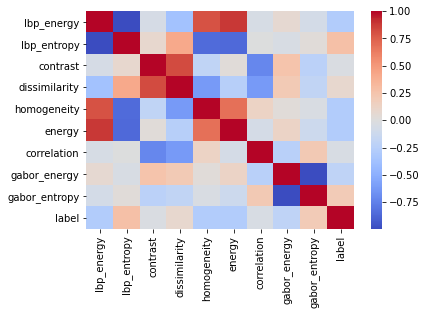

In [41]:
#Import the Libraries and read the data into a Pandas DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Visualise the data
plt.figure()
sns.heatmap(df_train.corr(), cmap='coolwarm')
plt.show()

In [42]:
df_test

,lbp_energy,lbp_entropy,contrast,dissimilarity,homogeneity,energy,correlation,gabor_energy,gabor_entropy,img_id,label
0,0.045941,0.846865,0.032382,0.103458,0.384764,0.039760,0.440654,0.783663,0.006105,1000,0
1,0.192992,0.651964,0.033830,0.052939,0.636903,0.201028,0.477738,0.781444,0.011614,1005,0
2,0.311025,0.554784,0.021039,0.029169,0.734127,0.327305,0.472106,0.782861,0.007648,1013,0
3,0.266862,0.626770,0.020383,0.055710,0.629965,0.572579,0.431869,0.501199,0.294313,1023,0
4,0.311916,0.582170,0.029273,0.066715,0.638905,0.610597,0.469680,0.762281,0.040730,1024,0
...,...,...,...,...,...,...,...,...,...,...,...
855,0.018420,0.901519,0.470786,0.557358,0.085690,0.013765,0.214525,0.735663,0.078630,972,2
856,0.001828,0.927836,0.118172,0.277365,0.090079,0.011823,0.341986,0.753953,0.056376,977,2
857,0.036302,0.868800,0.068710,0.160559,0.293240,0.022367,0.444781,0.763211,0.040865,980,2
858,0.004471,0.923005,0.030583,0.110309,0.203026,0.015881,0.459696,0.392432,0.367357,983,2


In [43]:
#df_test = pd.concat([df_test, df_test_label], axis=1)
#df_test=df_test.rename(columns={0: "label"}, errors="raise")

# JSON Files Processing

# Splitting Json into Train and Test

In [44]:
original_folder = r'C:\Users\Sharoz\Downloads\Dataset\Labelled_data\Json'

split_folder = r'C:\Users\Sharoz\Downloads\Dataset\Labelled_data\split_json'

In [45]:
import splitfolders

splitfolders.ratio(original_folder, output=split_folder,
   ratio=(.8, .2))

def listfiles(dir):
    filenames= os.listdir(dir)
    for filename in filenames:
        #print(filename)
        #print('Folder_path:' +os.path.abspath(os.path.join(dir,filename)), sep='\n')
        destination = Dest_path + filename
        source = os.path.abspath(os.path.join(dir,filename))
        
        #print(source)
        #print(destination)
        #shutil.copy(source, destination)
        #print('copied', filename)  

In [46]:
train_folder = r'C:\Users\Sharoz\Downloads\Dataset\Labelled_data\split_json\train'
test_folder = r'C:\Users\Sharoz\Downloads\Dataset\Labelled_data\split_json\test'

In [47]:
import pandas as pd
import json
from pandas.io.json import json_normalize

# Extracting Features of Json files

Following are the features extracted from Json files.
- No. of comments and No. of likes are always considered to be an important feature in defining the popularity of an image.
- Also, the following of an account also does matter. In addition to this we have also considered the dimension of an image as resolution plays an important factor in the aesthetic of an image.


# TRAINING DATASET

In [48]:
def listDir(dir):
    #declaring the list variables
    image_ids = []
    comment_counts = []
    like_counts = []
    followers_count =[]
    heights = []
    widths = []
    follows = []
    reel_counts = []
    blocked_by_viewers =[]
    filenames= os.listdir(dir)
    img_train_id = []
    train_label = []
    i=0
    categories = []
    #print(filenames)
    for filename in filenames:
        #print(filename)
        #print('Folder_path:' +os.path.abspath(os.path.join(dir,filename)), sep='\n')
        path = os.path.abspath(os.path.join(dir,filename))
        #print(path)
        mean_f =0
        mean_r = 0
        for files in  os.listdir(path):
         #   print(filename)
          #  print(files)
            #destination = filenames + filename
            img_train_ids = files.split('_')[0]
            img_train_id.append(img_train_ids)
            labels = files.split('_')[1]
            train_label.append(labels)
            source = os.path.abspath(os.path.join(path,files))
            with open(source, 'r') as f:
                data = json.load(f)
                packages_str = json.dumps(data, indent=2)
                #print(packages_str)
                #if i<=1120:
                image_id = data['node']['id']
                image_ids.append(image_id)
                #else:
                 #   pass
                #df = pd.DataFrame (dataText, columns = ['Text'])
                #df_json['ids'].append(image_id)
                #print(image_id)
                category = categories.append(filename)
                try:
                    comments_count = data['node']['edge_media_to_comment']['count']
                    comment_counts.append(comments_count)
                    #print(comment_counts)
                except KeyError: # handling the case where the token is not in vocabulary
                         
                    continue
                
               # comments_count = data['node']['edge_media_to_comment']
                try:
                    likes_count = data['node']['edge_media_preview_like']['count']
                    like_counts.append(likes_count)
                except KeyError: # handling the case where the token is not in vocabulary
                         
                    continue
                try:
                    height = data['node']['dimensions']['height']
                    heights.append(height)
                    #print(comment_counts)
                except KeyError: # handling the case where the token is not in vocabulary
                         
                    continue
            
                try:
                    width = data['node']['dimensions']['width']
                    widths.append(width)
                    #print(comment_counts)
                except KeyError: # handling the case where the token is not in vocabulary
                         
                    continue
              
            
                try:
                    follow = data['node']['owner']['edge_follow']['count']
                    #print(followed_by)
                    follows.append(follow)
                    mean_f = follow+ mean_f
                    #print(comment_counts)
                except KeyError: # handling the case where the token is not in vocabulary
                    final_mean = mean_f/(len(follows)+1) 
                    follows.append(final_mean)
                    continue
                #Verified_counts = data['node']['owner']['edge_related_profiles']['edges']['node']['is_verified']
                
                try:
                    blocked_by_viewer = data['node']['owner']['blocked_by_viewer']
                    #print(followed_by)
                    blocked_by_viewers.append(blocked_by_viewer)
                    #print(comment_counts)
                except KeyError: # handling the case where the token is not in vocabulary
                    blocked_by_viewers.append("false")
                    continue
           
             #   continue
            #print(comments_count)
            #df_json['comment_count'] = df_json.apply(comment_count,axis =1)
            #df_json['comment_count'] = 
            #print(comments_count)
            #print('\n\n\n')
            #df = json_normalize(data)
            #df.to_csv('C:/Users/Sharoz/Downloads/Dataset/Loreal/csvfile/jsondata.csv', index=False)
        df_json = pd.DataFrame (image_ids, columns = ['image_id'])
        df_json = df_json.iloc[: , :]
        print(len(comment_counts))
        #for i in range(0,1120):
        if len(df_json)<700:
            df_json['comments_count'] = comment_counts[0:677]
        elif len(df_json)<1500:
            df_json['comments_count'] = comment_counts[0:1463]
        else:
            df_json['comments_count'] = comment_counts[0:2512]
        
        if len(df_json)<700:
            df_json['likes_count'] = like_counts[0:677]
        elif len(df_json)<1500:
            df_json['likes_count'] = like_counts[0:1463]
        else:
            df_json['likes_count'] = like_counts[0:2512]
        
        if len(df_json)<700:
            df_json['height'] = heights[0:677]
        elif len(df_json)<1500:
            df_json['height'] = heights[0:1463]
        else:
            df_json['height'] = heights[0:2512]
        
        if len(df_json)<700:
            df_json['width'] = widths[0:677]
        elif len(df_json)<1500:
            df_json['width'] = widths[0:1463]
        else:
            df_json['width'] = widths[0:2512]
            
        if len(df_json)<700:
            df_json['category'] = categories[0:677]
        elif len(df_json)<1500:
            df_json['category'] = categories[0:1463]
        else:
            df_json['category'] = categories[0:2512]
        
        if len(df_json)<700:
            df_json['follows'] = follows[0:677]
        elif len(df_json)<1500:
            df_json['follows'] = follows[0:1463]
        else:
            df_json['follows'] = follows[0:2512]
        df_json['img_id'] = img_train_id
        df_json['label'] = train_label
        
        
       # if len(df_json)<700:
        #    df_json['blocked_by_viewer'] = blocked_by_viewers[0:677]
        #elif len(df_json)<1500:
         #   df_json['blocked_by_viewer'] = blocked_by_viewers[0:1463]
        #else:
         #   df_json['blocked_by_viewer'] = blocked_by_viewers[0:1577]
        
          
        
    #for i in range(0,1120):
        #df_json['likes_count'] = like_counts[0:1121]
        #df_json['height'] = heights[0:1121]
        #df_json['width'] = widths[0:1121]
        #df_json['followers_count'] = followers_count[0:1121]
        #df_json['follows'] = follows[0:1121]
        #df_json['reel_count'] = reel_counts[0:1121]
    #df_json['follower_counts'] = follower_counts[0:1121]
    #df_json = pd.DataFrame (comment_counts, columns = ['comments_count'])#df_json.apply(comments_count, axis=1)
    #df_json['likes_count'] = df_json.apply(likes_count, axis=1)
    #df_json['followers_count'] = df_json.apply(followers_count, axis=1)
    return df_json
        

In [49]:
df_json_train = listDir(train_folder)

668
1438
2020


In [50]:
df_json_train2= df_json_train.copy()
df_json_train2

,image_id,comments_count,likes_count,height,width,category,follows,img_id,label
0,2871270766674398747,1,229,1333,750,Lakme,329.0,1005,1
1,2871300789512666062,4,701,1080,1080,Lakme,111.0,1006,1
2,2871331849608818788,1,317,1350,1080,Lakme,329.0,1007,1
3,2871334239070488163,3,256,1080,1080,Lakme,329.0,1008,1
4,2871394885240732850,2,5,1080,1080,Lakme,219.6,1009,1
...,...,...,...,...,...,...,...,...,...
2015,2638110990791485300,21,4951,750,750,Maybelline,1323.0,994,2
2016,2638201077108735455,42,4966,1333,750,Maybelline,1323.0,995,2
2017,2638774984673978612,101,16255,1080,1080,Maybelline,1323.0,997,2
2018,2638893320694026156,53,9424,1920,1080,Maybelline,1323.0,999,2


# Scaling of Training Data

This estimator scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one.

The transformation is given by:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min

In [51]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(df_json_train2.loc[:,['comments_count','height','width','follows']]), columns=df_json_train2.loc[:,['comments_count','height','width','follows']].columns)

In [52]:
#Apply min Max sclar on number of likes/likes count
scaler_likes = MinMaxScaler()
df_norm_likes =pd.DataFrame(scaler_likes.fit_transform(df_json_train2.loc[:,'likes_count':'likes_count']))

In [53]:
df_norm_likes = df_norm_likes.rename(columns={0: "likes_count"}, errors="raise")

In [54]:
df_norm = pd.concat([df_norm,df_norm_likes], axis=1)

In [55]:
df_norm

,comments_count,height,width,follows,likes_count
0,0.000065,0.607190,0.45,0.245827,0.001641
1,0.000260,0.438748,1.00,0.080425,0.005007
2,0.000065,0.618509,1.00,0.245827,0.002268
3,0.000195,0.438748,1.00,0.245827,0.001833
4,0.000130,0.438748,1.00,0.162822,0.000043
...,...,...,...,...,...
2015,0.001366,0.219041,0.45,1.000000,0.035321
2016,0.002732,0.607190,0.45,1.000000,0.035428
2017,0.006570,0.438748,1.00,1.000000,0.115950
2018,0.003448,0.998003,1.00,1.000000,0.067226


In [56]:
#replace the columns with their respective normalised values
df_json_train2['comments_count'] = df_norm['comments_count'].values

In [57]:
#replace the columns with their respective normalised values
df_json_train2['likes_count'] = df_norm['likes_count'].values

In [58]:
#replace the columns with their respective normalised values
df_json_train2['height'] = df_norm['height'].values

In [59]:
#replace the columns with their respective normalised values
df_json_train2['width'] = df_norm['width'].values

In [60]:
#replace the columns with their respective normalised values
df_json_train2['follows'] = df_norm['follows'].values

In [61]:
df_json_train2

,image_id,comments_count,likes_count,height,width,category,follows,img_id,label
0,2871270766674398747,0.000065,0.001641,0.607190,0.45,Lakme,0.245827,1005,1
1,2871300789512666062,0.000260,0.005007,0.438748,1.00,Lakme,0.080425,1006,1
2,2871331849608818788,0.000065,0.002268,0.618509,1.00,Lakme,0.245827,1007,1
3,2871334239070488163,0.000195,0.001833,0.438748,1.00,Lakme,0.245827,1008,1
4,2871394885240732850,0.000130,0.000043,0.438748,1.00,Lakme,0.162822,1009,1
...,...,...,...,...,...,...,...,...,...
2015,2638110990791485300,0.001366,0.035321,0.219041,0.45,Maybelline,1.000000,994,2
2016,2638201077108735455,0.002732,0.035428,0.607190,0.45,Maybelline,1.000000,995,2
2017,2638774984673978612,0.006570,0.115950,0.438748,1.00,Maybelline,1.000000,997,2
2018,2638893320694026156,0.003448,0.067226,0.998003,1.00,Maybelline,1.000000,999,2


In [62]:
df_json_train2 = df_json_train2.drop(['category'], axis=1) #drop the category feature as we already have label

In [63]:
df_json_train2['new_id'] = df_json_train2['img_id'].astype(str) +"-"+ df_json_train2["label"]

In [64]:
df_json_train2

,image_id,comments_count,likes_count,height,width,follows,img_id,label,new_id
0,2871270766674398747,0.000065,0.001641,0.607190,0.45,0.245827,1005,1,1005-1
1,2871300789512666062,0.000260,0.005007,0.438748,1.00,0.080425,1006,1,1006-1
2,2871331849608818788,0.000065,0.002268,0.618509,1.00,0.245827,1007,1,1007-1
3,2871334239070488163,0.000195,0.001833,0.438748,1.00,0.245827,1008,1,1008-1
4,2871394885240732850,0.000130,0.000043,0.438748,1.00,0.162822,1009,1,1009-1
...,...,...,...,...,...,...,...,...,...
2015,2638110990791485300,0.001366,0.035321,0.219041,0.45,1.000000,994,2,994-2
2016,2638201077108735455,0.002732,0.035428,0.607190,0.45,1.000000,995,2,995-2
2017,2638774984673978612,0.006570,0.115950,0.438748,1.00,1.000000,997,2,997-2
2018,2638893320694026156,0.003448,0.067226,0.998003,1.00,1.000000,999,2,999-2


# Test Data

In [65]:
def listDirtest(dir):
    image_ids = []
    comment_counts = []
    like_counts = []
    followers_count =[]
    heights = []
    widths = []
    follows = []
    reel_counts = []
    blocked_by_viewers =[]
    img_test_id = []
    test_label =[]
    filenames= os.listdir(dir)
    i=0
    categories = []
    #print(filenames)
    for filename in filenames:
        #print(filename)
        #print('Folder_path:' +os.path.abspath(os.path.join(dir,filename)), sep='\n')
        path = os.path.abspath(os.path.join(dir,filename))
        #print(path)
        mean_f =0
        mean_r = 0
        for files in  os.listdir(path):
         #   print(filename)
          #  print(files)
            #destination = filenames + filename
            source = os.path.abspath(os.path.join(path,files))
            img_test_ids = files.split('_')[0]
            img_test_id.append(img_test_ids)
            labels = files.split('_')[1]
            test_label.append(labels)
            with open(source, 'r') as f:
                data = json.load(f)
                packages_str = json.dumps(data, indent=2)
                #print(packages_str)
                #if i<=1120:
                image_id = data['node']['id']
                image_ids.append(image_id)
                #else:
                 #   pass
                #df = pd.DataFrame (dataText, columns = ['Text'])
                #df_json['ids'].append(image_id)
                #print(image_id)
                category = categories.append(filename)
                try:
                    comments_count = data['node']['edge_media_to_comment']['count']
                    comment_counts.append(comments_count)
                    #print(comment_counts)
                except KeyError: # handling the case where the token is not in vocabulary
                         
                    continue
                
               # comments_count = data['node']['edge_media_to_comment']
                try:
                    likes_count = data['node']['edge_media_preview_like']['count']
                    like_counts.append(likes_count)
                except KeyError: # handling the case where the token is not in vocabulary
                         
                    continue
                try:
                    height = data['node']['dimensions']['height']
                    heights.append(height)
                    #print(comment_counts)
                except KeyError: # handling the case where the token is not in vocabulary
                         
                    continue
            
                try:
                    width = data['node']['dimensions']['width']
                    widths.append(width)
                    #print(comment_counts)
                except KeyError: # handling the case where the token is not in vocabulary
                         
                    continue
              
            
                try:
                    follow = data['node']['owner']['edge_follow']['count']
                    #print(followed_by)
                    follows.append(follow)
                    mean_f = follow+ mean_f
                    #print(comment_counts)
                except KeyError: # handling the case where the token is not in vocabulary
                    final_mean = mean_f/(len(follows)+1) 
                    follows.append(final_mean)
                    continue
                #Verified_counts = data['node']['owner']['edge_related_profiles']['edges']['node']['is_verified']
                
                try:
                    blocked_by_viewer = data['node']['owner']['blocked_by_viewer']
                    #print(followed_by)
                    blocked_by_viewers.append(blocked_by_viewer)
                    #print(comment_counts)
                except KeyError: # handling the case where the token is not in vocabulary
                    blocked_by_viewers.append("false")
                    continue
           
             #   continue
            #print(comments_count)
            #df_json['comment_count'] = df_json.apply(comment_count,axis =1)
            #df_json['comment_count'] = 
            #print(comments_count)
            #print('\n\n\n')
            #df = json_normalize(data)
            #df.to_csv('C:/Users/Sharoz/Downloads/Dataset/Loreal/csvfile/jsondata.csv', index=False)
        df_json = pd.DataFrame (image_ids, columns = ['image_id'])
        df_json = df_json.iloc[: , :]
        print(len(comment_counts))
        #for i in range(0,1120):
        if len(df_json)<200:
            df_json['comments_count'] = comment_counts[0:191]
        elif len(df_json)<450:
            df_json['comments_count'] = comment_counts[0:417]
        else:
            df_json['comments_count'] = comment_counts[0:718]
        
        if len(df_json)<200:
            df_json['likes_count'] = like_counts[0:191]
        elif len(df_json)<450:
            df_json['likes_count'] = like_counts[0:417]
        else:
            df_json['likes_count'] = like_counts[0:718]
        
        if len(df_json)<200:
            df_json['height'] = heights[0:191]
        elif len(df_json)<450:
            df_json['height'] = heights[0:417]
        else:
            df_json['height'] = heights[0:718]
        
        if len(df_json)<200:
            df_json['width'] = widths[0:191]
        elif len(df_json)<450:
            df_json['width'] = widths[0:417]
        else:
            df_json['width'] = widths[0:718]
            
        if len(df_json)<200:
            df_json['category'] = categories[0:191]
        elif len(df_json)<450:
            df_json['category'] = categories[0:417]
        else:
            df_json['category'] = categories[0:718]
        
        if len(df_json)<200:
            df_json['follows'] = follows[0:191]
        elif len(df_json)<450:
            df_json['follows'] = follows[0:417]
        else:
            df_json['follows'] = follows[0:718]
        
        df_json['img_id'] = img_test_id
        df_json['label'] = test_label
        
       # if len(df_json)<700:
        #    df_json['blocked_by_viewer'] = blocked_by_viewers[0:677]
        #elif len(df_json)<1500:
         #   df_json['blocked_by_viewer'] = blocked_by_viewers[0:1463]
        #else:
         #   df_json['blocked_by_viewer'] = blocked_by_viewers[0:1577]
        
          
        
    #for i in range(0,1120):
        #df_json['likes_count'] = like_counts[0:1121]
        #df_json['height'] = heights[0:1121]
        #df_json['width'] = widths[0:1121]
        #df_json['followers_count'] = followers_count[0:1121]
        #df_json['follows'] = follows[0:1121]
        #df_json['reel_count'] = reel_counts[0:1121]
    #df_json['follower_counts'] = follower_counts[0:1121]
    #df_json = pd.DataFrame (comment_counts, columns = ['comments_count'])#df_json.apply(comments_count, axis=1)
    #df_json['likes_count'] = df_json.apply(likes_count, axis=1)
    #df_json['followers_count'] = df_json.apply(followers_count, axis=1)
    return df_json
        

In [66]:
df_json_test = listDirtest(test_folder)

167
360
506


In [67]:
df_json_test2= df_json_test.copy()
df_json_test2.tail(10)

,image_id,comments_count,likes_count,height,width,category,follows,img_id,label
496,2620074102580754321,46,9314,1136,640,Maybelline,1323.0,921,2
497,2622804612461600549,338,20811,1112,1080,Maybelline,1323.0,934,2
498,2622952990403146797,112,16798,1138,640,Maybelline,1323.0,936,2
499,2625633216803305146,38,7437,1080,1080,Maybelline,1323.0,948,2
500,2627746654186631513,173,14045,1080,1080,Maybelline,1323.0,957,2
501,2630086837543568389,130,10573,1080,1080,Maybelline,1323.0,965,2
502,2632835293111395007,17,387,1080,1080,Maybelline,5.0,975,2
503,2634224505311147356,8,158,1080,1080,Maybelline,5.0,982,2
504,2635878007875492958,22,6201,1315,1080,Maybelline,1323.0,985,2
505,2160163705401065143,36,1030,1080,1080,Maybelline,5.0,98,2


# Scaling of Testing Data

In [68]:
#from sklearn.preprocessing import MinMaxScaler

# create a scaler object
#scaler = MinMaxScaler()
# fit and transform the data
df_test_norm = pd.DataFrame(scaler.transform(df_json_test2.loc[:,['comments_count','height','width','follows']]), columns=df_json_test2.loc[:,['comments_count','height','width','follows']].columns)

In [69]:
#scaler_likes = MinMaxScaler()
df_norm_likes =pd.DataFrame(scaler_likes.transform(df_json_test2.loc[:,'likes_count':'likes_count']))
df_norm_likes = df_norm_likes.rename(columns={0: "likes_count"}, errors="raise")
df_test_norm = pd.concat([df_test_norm,df_norm_likes], axis=1)

In [70]:
df_json_test2['comments_count'] = df_test_norm['comments_count'].values

In [71]:
df_json_test2['likes_count'] = df_test_norm['likes_count'].values

In [72]:
df_json_test2['height'] = df_test_norm['height'].values

In [73]:
df_json_test2['width'] = df_test_norm['width'].values

In [74]:
df_json_test2['follows'] = df_test_norm['follows'].values

In [75]:
df_json_test2

,image_id,comments_count,likes_count,height,width,category,follows,img_id,label
0,2666794195603199911,0.000390,0.000585,0.607190,0.450000,Lakme,0.080425,102,1
1,2873409200732816377,0.000065,0.000036,0.438748,1.000000,Lakme,0.038316,1034,1
2,2873416257694196132,0.000195,0.003352,0.438748,1.000000,Lakme,0.080425,1035,1
3,2874322294474601315,0.000585,0.015856,0.476698,0.266667,Lakme,0.080425,1052,1
4,2875633923923251270,0.000065,0.010763,0.476698,0.266667,Lakme,0.080425,1072,1
...,...,...,...,...,...,...,...,...,...
501,2630086837543568389,0.008456,0.075422,0.438748,1.000000,Maybelline,1.000000,965,2
502,2632835293111395007,0.001106,0.002768,0.438748,1.000000,Maybelline,0.000000,975,2
503,2634224505311147356,0.000520,0.001134,0.438748,1.000000,Maybelline,0.000000,982,2
504,2635878007875492958,0.001431,0.044237,0.595206,1.000000,Maybelline,1.000000,985,2


In [76]:
df_json_test2 = df_json_test2.drop(['category'], axis=1)

In [77]:
df_json_test2['new_id'] = df_json_test2['img_id'].astype(str) +"-"+ df_json_test2["label"]

In [78]:
df_json_test2

,image_id,comments_count,likes_count,height,width,follows,img_id,label,new_id
0,2666794195603199911,0.000390,0.000585,0.607190,0.450000,0.080425,102,1,102-1
1,2873409200732816377,0.000065,0.000036,0.438748,1.000000,0.038316,1034,1,1034-1
2,2873416257694196132,0.000195,0.003352,0.438748,1.000000,0.080425,1035,1,1035-1
3,2874322294474601315,0.000585,0.015856,0.476698,0.266667,0.080425,1052,1,1052-1
4,2875633923923251270,0.000065,0.010763,0.476698,0.266667,0.080425,1072,1,1072-1
...,...,...,...,...,...,...,...,...,...
501,2630086837543568389,0.008456,0.075422,0.438748,1.000000,1.000000,965,2,965-2
502,2632835293111395007,0.001106,0.002768,0.438748,1.000000,0.000000,975,2,975-2
503,2634224505311147356,0.000520,0.001134,0.438748,1.000000,0.000000,982,2,982-2
504,2635878007875492958,0.001431,0.044237,0.595206,1.000000,1.000000,985,2,985-2


# Final Dataframes

# Training(df_train_final(image and json features merged), X_train, Y_train)

In [79]:
df_train

,lbp_energy,lbp_entropy,contrast,dissimilarity,homogeneity,energy,correlation,gabor_energy,gabor_entropy,img_id,label
0,0.026346,0.956897,0.157181,0.379301,0.319580,0.045965,0.574594,0.774426,0.068853,1001,0
1,0.005590,0.989673,0.045160,0.152404,0.189090,0.015831,0.568563,0.813636,0.014531,1002,0
2,0.118544,0.802704,0.017742,0.085994,0.531246,0.261804,0.637545,0.403128,0.343829,1003,0
3,0.579147,0.353196,0.042068,0.070620,0.839335,0.625312,0.569915,0.800937,0.036334,1004,0
4,0.559808,0.374274,0.045253,0.077198,0.827927,0.613077,0.566243,0.798391,0.040364,1006,0
...,...,...,...,...,...,...,...,...,...,...,...
3430,0.006281,0.988263,0.022914,0.182470,0.144739,0.010517,0.627390,0.408598,0.392567,997,2
3431,0.010354,0.981935,0.096612,0.217840,0.268973,0.017882,0.569530,0.786708,0.053772,998,2
3432,0.100012,0.829068,0.003720,0.046249,0.562174,0.069001,0.648937,0.551779,0.241701,999,2
3433,0.065633,0.881328,0.080025,0.152023,0.413856,0.034136,0.604201,0.809540,0.021872,99,2


In [80]:
df_train['new_id'] = df_train['img_id'].astype(str) +"-"+ df_train["label"].astype(str) #form new_id as aunique key to be used for merging from label and image_id

In [81]:
df_train

,lbp_energy,lbp_entropy,contrast,dissimilarity,homogeneity,energy,correlation,gabor_energy,gabor_entropy,img_id,label,new_id
0,0.026346,0.956897,0.157181,0.379301,0.319580,0.045965,0.574594,0.774426,0.068853,1001,0,1001-0
1,0.005590,0.989673,0.045160,0.152404,0.189090,0.015831,0.568563,0.813636,0.014531,1002,0,1002-0
2,0.118544,0.802704,0.017742,0.085994,0.531246,0.261804,0.637545,0.403128,0.343829,1003,0,1003-0
3,0.579147,0.353196,0.042068,0.070620,0.839335,0.625312,0.569915,0.800937,0.036334,1004,0,1004-0
4,0.559808,0.374274,0.045253,0.077198,0.827927,0.613077,0.566243,0.798391,0.040364,1006,0,1006-0
...,...,...,...,...,...,...,...,...,...,...,...,...
3430,0.006281,0.988263,0.022914,0.182470,0.144739,0.010517,0.627390,0.408598,0.392567,997,2,997-2
3431,0.010354,0.981935,0.096612,0.217840,0.268973,0.017882,0.569530,0.786708,0.053772,998,2,998-2
3432,0.100012,0.829068,0.003720,0.046249,0.562174,0.069001,0.648937,0.551779,0.241701,999,2,999-2
3433,0.065633,0.881328,0.080025,0.152023,0.413856,0.034136,0.604201,0.809540,0.021872,99,2,99-2


In [82]:
df_train_final = pd.merge(df_train,df_json_train2, on =('new_id')) #Merge the Json and Image features dataframes

In [83]:
df_train_final

,lbp_energy,lbp_entropy,contrast,dissimilarity,homogeneity,energy,correlation,gabor_energy,gabor_entropy,img_id_x,label_x,new_id,image_id,comments_count,likes_count,height,width,follows,img_id_y,label_y
0,0.026346,0.956897,0.157181,0.379301,0.319580,0.045965,0.574594,0.774426,0.068853,1001,0,1001-0,2824991107744109591,0.001561,0.011648,0.438748,1.00,0.857360,1001,0
1,0.005590,0.989673,0.045160,0.152404,0.189090,0.015831,0.568563,0.813636,0.014531,1002,0,1002-0,2825024324338885888,0.019775,0.037982,0.616511,1.00,0.101669,1002,0
2,0.118544,0.802704,0.017742,0.085994,0.531246,0.261804,0.637545,0.403128,0.343829,1003,0,1003-0,2825504521162554492,0.012294,0.008959,0.438748,1.00,0.101669,1003,0
3,0.579147,0.353196,0.042068,0.070620,0.839335,0.625312,0.569915,0.800937,0.036334,1004,0,1004-0,2825595110916125526,0.020556,0.008809,0.438748,1.00,0.101669,1004,0
4,0.559808,0.374274,0.045253,0.077198,0.827927,0.613077,0.566243,0.798391,0.040364,1006,0,1006-0,2825746132384361950,0.043128,0.010193,0.438748,1.00,0.101669,1006,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,0.002886,0.994806,0.025992,0.190542,0.104110,0.007910,0.634423,0.781120,0.056390,994,2,994-2,2638110990791485300,0.001366,0.035321,0.219041,0.45,1.000000,994,2
1608,0.025705,0.960036,0.037245,0.150307,0.362634,0.089821,0.621141,0.611724,0.206352,995,2,995-2,2638201077108735455,0.002732,0.035428,0.607190,0.45,1.000000,995,2
1609,0.006281,0.988263,0.022914,0.182470,0.144739,0.010517,0.627390,0.408598,0.392567,997,2,997-2,2638774984673978612,0.006570,0.115950,0.438748,1.00,1.000000,997,2
1610,0.100012,0.829068,0.003720,0.046249,0.562174,0.069001,0.648937,0.551779,0.241701,999,2,999-2,2638893320694026156,0.003448,0.067226,0.998003,1.00,1.000000,999,2


In [84]:
df_train_final = df_train_final.drop(['img_id_x','img_id_y','label_x'], axis=1)

In [85]:
df_train_final

,lbp_energy,lbp_entropy,contrast,dissimilarity,homogeneity,energy,correlation,gabor_energy,gabor_entropy,new_id,image_id,comments_count,likes_count,height,width,follows,label_y
0,0.026346,0.956897,0.157181,0.379301,0.319580,0.045965,0.574594,0.774426,0.068853,1001-0,2824991107744109591,0.001561,0.011648,0.438748,1.00,0.857360,0
1,0.005590,0.989673,0.045160,0.152404,0.189090,0.015831,0.568563,0.813636,0.014531,1002-0,2825024324338885888,0.019775,0.037982,0.616511,1.00,0.101669,0
2,0.118544,0.802704,0.017742,0.085994,0.531246,0.261804,0.637545,0.403128,0.343829,1003-0,2825504521162554492,0.012294,0.008959,0.438748,1.00,0.101669,0
3,0.579147,0.353196,0.042068,0.070620,0.839335,0.625312,0.569915,0.800937,0.036334,1004-0,2825595110916125526,0.020556,0.008809,0.438748,1.00,0.101669,0
4,0.559808,0.374274,0.045253,0.077198,0.827927,0.613077,0.566243,0.798391,0.040364,1006-0,2825746132384361950,0.043128,0.010193,0.438748,1.00,0.101669,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,0.002886,0.994806,0.025992,0.190542,0.104110,0.007910,0.634423,0.781120,0.056390,994-2,2638110990791485300,0.001366,0.035321,0.219041,0.45,1.000000,2
1608,0.025705,0.960036,0.037245,0.150307,0.362634,0.089821,0.621141,0.611724,0.206352,995-2,2638201077108735455,0.002732,0.035428,0.607190,0.45,1.000000,2
1609,0.006281,0.988263,0.022914,0.182470,0.144739,0.010517,0.627390,0.408598,0.392567,997-2,2638774984673978612,0.006570,0.115950,0.438748,1.00,1.000000,2
1610,0.100012,0.829068,0.003720,0.046249,0.562174,0.069001,0.648937,0.551779,0.241701,999-2,2638893320694026156,0.003448,0.067226,0.998003,1.00,1.000000,2


In [86]:
df_train_final = df_train_final.drop(['new_id', 'image_id'], axis=1)

In [87]:
df_train_final

,lbp_energy,lbp_entropy,contrast,dissimilarity,homogeneity,energy,correlation,gabor_energy,gabor_entropy,comments_count,likes_count,height,width,follows,label_y
0,0.026346,0.956897,0.157181,0.379301,0.319580,0.045965,0.574594,0.774426,0.068853,0.001561,0.011648,0.438748,1.00,0.857360,0
1,0.005590,0.989673,0.045160,0.152404,0.189090,0.015831,0.568563,0.813636,0.014531,0.019775,0.037982,0.616511,1.00,0.101669,0
2,0.118544,0.802704,0.017742,0.085994,0.531246,0.261804,0.637545,0.403128,0.343829,0.012294,0.008959,0.438748,1.00,0.101669,0
3,0.579147,0.353196,0.042068,0.070620,0.839335,0.625312,0.569915,0.800937,0.036334,0.020556,0.008809,0.438748,1.00,0.101669,0
4,0.559808,0.374274,0.045253,0.077198,0.827927,0.613077,0.566243,0.798391,0.040364,0.043128,0.010193,0.438748,1.00,0.101669,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,0.002886,0.994806,0.025992,0.190542,0.104110,0.007910,0.634423,0.781120,0.056390,0.001366,0.035321,0.219041,0.45,1.000000,2
1608,0.025705,0.960036,0.037245,0.150307,0.362634,0.089821,0.621141,0.611724,0.206352,0.002732,0.035428,0.607190,0.45,1.000000,2
1609,0.006281,0.988263,0.022914,0.182470,0.144739,0.010517,0.627390,0.408598,0.392567,0.006570,0.115950,0.438748,1.00,1.000000,2
1610,0.100012,0.829068,0.003720,0.046249,0.562174,0.069001,0.648937,0.551779,0.241701,0.003448,0.067226,0.998003,1.00,1.000000,2


# Heat Map for our final dataset to define the corelation between features
- Blue - indicates negative or inverse relation
- Red  - indicates positive or direct relation

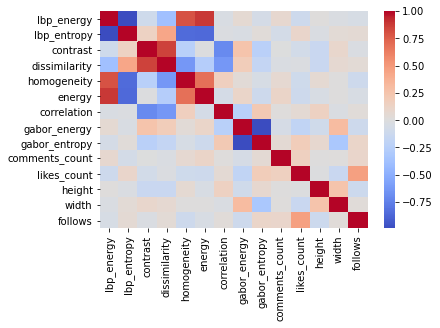

In [88]:
#Import the Libraries and read the data into a Pandas DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Visualise the data
plt.figure()
sns.heatmap(df_train_final.corr(), cmap='coolwarm')
plt.show()

In [89]:
df_train_final= df_train_final.rename(columns={'label_y': "label"}, errors="raise")

In [90]:
df_train_final

,lbp_energy,lbp_entropy,contrast,dissimilarity,homogeneity,energy,correlation,gabor_energy,gabor_entropy,comments_count,likes_count,height,width,follows,label
0,0.026346,0.956897,0.157181,0.379301,0.319580,0.045965,0.574594,0.774426,0.068853,0.001561,0.011648,0.438748,1.00,0.857360,0
1,0.005590,0.989673,0.045160,0.152404,0.189090,0.015831,0.568563,0.813636,0.014531,0.019775,0.037982,0.616511,1.00,0.101669,0
2,0.118544,0.802704,0.017742,0.085994,0.531246,0.261804,0.637545,0.403128,0.343829,0.012294,0.008959,0.438748,1.00,0.101669,0
3,0.579147,0.353196,0.042068,0.070620,0.839335,0.625312,0.569915,0.800937,0.036334,0.020556,0.008809,0.438748,1.00,0.101669,0
4,0.559808,0.374274,0.045253,0.077198,0.827927,0.613077,0.566243,0.798391,0.040364,0.043128,0.010193,0.438748,1.00,0.101669,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,0.002886,0.994806,0.025992,0.190542,0.104110,0.007910,0.634423,0.781120,0.056390,0.001366,0.035321,0.219041,0.45,1.000000,2
1608,0.025705,0.960036,0.037245,0.150307,0.362634,0.089821,0.621141,0.611724,0.206352,0.002732,0.035428,0.607190,0.45,1.000000,2
1609,0.006281,0.988263,0.022914,0.182470,0.144739,0.010517,0.627390,0.408598,0.392567,0.006570,0.115950,0.438748,1.00,1.000000,2
1610,0.100012,0.829068,0.003720,0.046249,0.562174,0.069001,0.648937,0.551779,0.241701,0.003448,0.067226,0.998003,1.00,1.000000,2


In [91]:
X_train = df_train_final.drop(['likes_count', 'label'], axis=1).to_numpy() #converting input features dataframes to an array

In [92]:
Y_train = df_train_final.loc[:, ['likes_count', 'label']].to_numpy() #converting target features dataframe into an array

In [93]:
Y_train

array([[0.011647812379634517, '0'],
       [0.03798199689011255, '0'],
       [0.008958758327508238, '0'],
       ...,
       [0.11595029886303655, '2'],
       [0.06722635130315696, '2'],
       [0.004350989315111485, '2']], dtype=object)

# Testing (df_test_final(image and json features merged), X_test, Y_test)

In [94]:
df_test

,lbp_energy,lbp_entropy,contrast,dissimilarity,homogeneity,energy,correlation,gabor_energy,gabor_entropy,img_id,label
0,0.045941,0.846865,0.032382,0.103458,0.384764,0.039760,0.440654,0.783663,0.006105,1000,0
1,0.192992,0.651964,0.033830,0.052939,0.636903,0.201028,0.477738,0.781444,0.011614,1005,0
2,0.311025,0.554784,0.021039,0.029169,0.734127,0.327305,0.472106,0.782861,0.007648,1013,0
3,0.266862,0.626770,0.020383,0.055710,0.629965,0.572579,0.431869,0.501199,0.294313,1023,0
4,0.311916,0.582170,0.029273,0.066715,0.638905,0.610597,0.469680,0.762281,0.040730,1024,0
...,...,...,...,...,...,...,...,...,...,...,...
855,0.018420,0.901519,0.470786,0.557358,0.085690,0.013765,0.214525,0.735663,0.078630,972,2
856,0.001828,0.927836,0.118172,0.277365,0.090079,0.011823,0.341986,0.753953,0.056376,977,2
857,0.036302,0.868800,0.068710,0.160559,0.293240,0.022367,0.444781,0.763211,0.040865,980,2
858,0.004471,0.923005,0.030583,0.110309,0.203026,0.015881,0.459696,0.392432,0.367357,983,2


In [95]:
df_test['new_id'] = df_test['img_id'].astype(str) +"-"+ df_test["label"].astype(str) #form new_id as aunique key to be used for merging from label and image_id

In [96]:
df_test

,lbp_energy,lbp_entropy,contrast,dissimilarity,homogeneity,energy,correlation,gabor_energy,gabor_entropy,img_id,label,new_id
0,0.045941,0.846865,0.032382,0.103458,0.384764,0.039760,0.440654,0.783663,0.006105,1000,0,1000-0
1,0.192992,0.651964,0.033830,0.052939,0.636903,0.201028,0.477738,0.781444,0.011614,1005,0,1005-0
2,0.311025,0.554784,0.021039,0.029169,0.734127,0.327305,0.472106,0.782861,0.007648,1013,0,1013-0
3,0.266862,0.626770,0.020383,0.055710,0.629965,0.572579,0.431869,0.501199,0.294313,1023,0,1023-0
4,0.311916,0.582170,0.029273,0.066715,0.638905,0.610597,0.469680,0.762281,0.040730,1024,0,1024-0
...,...,...,...,...,...,...,...,...,...,...,...,...
855,0.018420,0.901519,0.470786,0.557358,0.085690,0.013765,0.214525,0.735663,0.078630,972,2,972-2
856,0.001828,0.927836,0.118172,0.277365,0.090079,0.011823,0.341986,0.753953,0.056376,977,2,977-2
857,0.036302,0.868800,0.068710,0.160559,0.293240,0.022367,0.444781,0.763211,0.040865,980,2,980-2
858,0.004471,0.923005,0.030583,0.110309,0.203026,0.015881,0.459696,0.392432,0.367357,983,2,983-2


In [97]:
df_test_final = pd.merge(df_test,df_json_test2, on =('new_id'))  #merge the two dataframes

In [98]:
df_test_final

,lbp_energy,lbp_entropy,contrast,dissimilarity,homogeneity,energy,correlation,gabor_energy,gabor_entropy,img_id_x,label_x,new_id,image_id,comments_count,likes_count,height,width,follows,img_id_y,label_y
0,0.013119,0.909954,0.064196,0.116472,0.344379,0.061284,0.462445,0.739836,0.073506,1072,0,1072-0,2834443382455129005,0.012424,0.012539,0.438748,1.00,0.101669,1072,0
1,0.046153,0.843090,0.001726,0.015428,0.533815,0.083304,0.479630,0.727024,0.089536,107,0,107-0,2482956770923740209,0.000390,0.001912,0.618509,1.00,0.041730,107,0
2,0.036899,0.868891,0.016717,0.063951,0.343652,0.022373,0.476635,0.783299,0.006762,1123,0,1123-0,2841152768902598962,0.005334,0.033895,0.618509,1.00,0.101669,1123,0
3,0.016653,0.901023,0.170906,0.253959,0.268838,0.026005,0.383058,0.755709,0.053113,1190,0,1190-0,2846584652813907892,0.010733,0.033702,0.193076,1.00,0.101669,1190,0
4,0.155934,0.713358,0.016398,0.036745,0.633020,0.111352,0.469645,0.340205,0.395428,1212,0,1212-0,2848991170612061438,0.002927,0.007932,0.607190,0.45,0.101669,1212,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.005930,0.920419,0.021062,0.097229,0.229236,0.019132,0.472668,0.765498,0.035979,748,2,748-2,2582228333035449374,0.008977,0.102641,0.438748,1.00,1.000000,748,2
102,0.008995,0.915198,0.090854,0.145755,0.313978,0.017804,0.415647,0.770513,0.030597,800,2,800-2,2591573145668732198,0.007090,0.115772,0.438748,1.00,1.000000,800,2
103,0.070410,0.821912,0.021365,0.085467,0.445322,0.125038,0.477025,0.167414,0.611829,832,2,832-2,2599254087219388916,0.000065,0.002011,0.219041,0.45,0.000000,832,2
104,0.002694,0.926216,0.017370,0.103667,0.144944,0.023428,0.391952,0.779091,0.015061,838,2,838-2,2601113624021092092,0.005009,0.098874,0.438748,1.00,1.000000,838,2


In [99]:
df_test_final = df_test_final.drop([ 'img_id_y','img_id_x','label_x','new_id'], axis=1)

In [100]:
df_test_final

,lbp_energy,lbp_entropy,contrast,dissimilarity,homogeneity,energy,correlation,gabor_energy,gabor_entropy,image_id,comments_count,likes_count,height,width,follows,label_y
0,0.013119,0.909954,0.064196,0.116472,0.344379,0.061284,0.462445,0.739836,0.073506,2834443382455129005,0.012424,0.012539,0.438748,1.00,0.101669,0
1,0.046153,0.843090,0.001726,0.015428,0.533815,0.083304,0.479630,0.727024,0.089536,2482956770923740209,0.000390,0.001912,0.618509,1.00,0.041730,0
2,0.036899,0.868891,0.016717,0.063951,0.343652,0.022373,0.476635,0.783299,0.006762,2841152768902598962,0.005334,0.033895,0.618509,1.00,0.101669,0
3,0.016653,0.901023,0.170906,0.253959,0.268838,0.026005,0.383058,0.755709,0.053113,2846584652813907892,0.010733,0.033702,0.193076,1.00,0.101669,0
4,0.155934,0.713358,0.016398,0.036745,0.633020,0.111352,0.469645,0.340205,0.395428,2848991170612061438,0.002927,0.007932,0.607190,0.45,0.101669,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.005930,0.920419,0.021062,0.097229,0.229236,0.019132,0.472668,0.765498,0.035979,2582228333035449374,0.008977,0.102641,0.438748,1.00,1.000000,2
102,0.008995,0.915198,0.090854,0.145755,0.313978,0.017804,0.415647,0.770513,0.030597,2591573145668732198,0.007090,0.115772,0.438748,1.00,1.000000,2
103,0.070410,0.821912,0.021365,0.085467,0.445322,0.125038,0.477025,0.167414,0.611829,2599254087219388916,0.000065,0.002011,0.219041,0.45,0.000000,2
104,0.002694,0.926216,0.017370,0.103667,0.144944,0.023428,0.391952,0.779091,0.015061,2601113624021092092,0.005009,0.098874,0.438748,1.00,1.000000,2


In [101]:
df_test_final= df_test_final.rename(columns={'label_y': "label"}, errors="raise")

In [102]:
df_test_final = df_test_final.drop(['image_id'], axis=1)

In [103]:
df_test_final

,lbp_energy,lbp_entropy,contrast,dissimilarity,homogeneity,energy,correlation,gabor_energy,gabor_entropy,comments_count,likes_count,height,width,follows,label
0,0.013119,0.909954,0.064196,0.116472,0.344379,0.061284,0.462445,0.739836,0.073506,0.012424,0.012539,0.438748,1.00,0.101669,0
1,0.046153,0.843090,0.001726,0.015428,0.533815,0.083304,0.479630,0.727024,0.089536,0.000390,0.001912,0.618509,1.00,0.041730,0
2,0.036899,0.868891,0.016717,0.063951,0.343652,0.022373,0.476635,0.783299,0.006762,0.005334,0.033895,0.618509,1.00,0.101669,0
3,0.016653,0.901023,0.170906,0.253959,0.268838,0.026005,0.383058,0.755709,0.053113,0.010733,0.033702,0.193076,1.00,0.101669,0
4,0.155934,0.713358,0.016398,0.036745,0.633020,0.111352,0.469645,0.340205,0.395428,0.002927,0.007932,0.607190,0.45,0.101669,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.005930,0.920419,0.021062,0.097229,0.229236,0.019132,0.472668,0.765498,0.035979,0.008977,0.102641,0.438748,1.00,1.000000,2
102,0.008995,0.915198,0.090854,0.145755,0.313978,0.017804,0.415647,0.770513,0.030597,0.007090,0.115772,0.438748,1.00,1.000000,2
103,0.070410,0.821912,0.021365,0.085467,0.445322,0.125038,0.477025,0.167414,0.611829,0.000065,0.002011,0.219041,0.45,0.000000,2
104,0.002694,0.926216,0.017370,0.103667,0.144944,0.023428,0.391952,0.779091,0.015061,0.005009,0.098874,0.438748,1.00,1.000000,2


In [104]:
X_test = df_test_final.drop(['likes_count', 'label'], axis=1).to_numpy() #convert input feature dataframe into an array

In [105]:
Y_test = df_test_final.loc[:, ['likes_count', 'label']].to_numpy() #convert input feature dataframe into an array

# Modelling

# XGBOOST

XGBoost Dmatrix - provides a way to convert our training and testing data into DMatrix. DMatrix is an optimized data structure that provides better memory efficiency and training speed.

The following code converts the training and testing data into DMatrix format.
- convert to DMatrix
d_train = xgb.DMatrix(x_train, y_train)
d_test = xgb.DMatrix(x_val, y_val)

XGBoost(eXtreme Gradient Boosting): Powerful machine learning algorithm especially where speed and accuracy are concern
- Regularization
- Parallel Processing
- High Flexibility
- Handling Missing Values
- Tree Pruning
- Built-in Cross-Validation.

In [106]:
# Load libraries
import os
import pandas as pd
import numpy as np
import math
import random
import collections
import timeit
import xgboost as xgb
import sklearn.metrics

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [107]:
print('Training set shape ', X_train.shape)
print('Test set shape ', X_test.shape)

Training set shape  (1612, 13)
Test set shape  (106, 13)


Form XGBoost DMatrix from input and target features

In [108]:
trlabel = Y_train
telabel = Y_test

dtrain = xgb.DMatrix(X_train, label=trlabel)
dtest  = xgb.DMatrix(X_test, label=telabel)

In [109]:
# Set parameters.
param = {'max_depth': 7, 
         'eta': 0.2,
         'objective': 'reg:squarederror',
         'nthread': 5,
         'eval_metric': 'rmse'
        }

In [110]:
#evaluate training dataset rmse with validation datset rmse
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [111]:
# Train the model.
num_round = 50
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-rmse:0.58543	train-rmse:0.58144
[1]	eval-rmse:0.47276	train-rmse:0.46694
[2]	eval-rmse:0.37949	train-rmse:0.37431
[3]	eval-rmse:0.30499	train-rmse:0.30016
[4]	eval-rmse:0.24564	train-rmse:0.24077
[5]	eval-rmse:0.19825	train-rmse:0.19321
[6]	eval-rmse:0.16060	train-rmse:0.15520
[7]	eval-rmse:0.13050	train-rmse:0.12474
[8]	eval-rmse:0.10713	train-rmse:0.10031
[9]	eval-rmse:0.08892	train-rmse:0.08079
[10]	eval-rmse:0.07489	train-rmse:0.06520
[11]	eval-rmse:0.06403	train-rmse:0.05269
[12]	eval-rmse:0.05667	train-rmse:0.04294
[13]	eval-rmse:0.05088	train-rmse:0.03503
[14]	eval-rmse:0.04729	train-rmse:0.02892
[15]	eval-rmse:0.04453	train-rmse:0.02392


C:\Users\Sharoz\anaconda3\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[16]	eval-rmse:0.04312	train-rmse:0.01994
[17]	eval-rmse:0.04171	train-rmse:0.01698
[18]	eval-rmse:0.04100	train-rmse:0.01470
[19]	eval-rmse:0.04037	train-rmse:0.01307
[20]	eval-rmse:0.04018	train-rmse:0.01177
[21]	eval-rmse:0.04003	train-rmse:0.01091
[22]	eval-rmse:0.03986	train-rmse:0.01017
[23]	eval-rmse:0.03974	train-rmse:0.00969
[24]	eval-rmse:0.03989	train-rmse:0.00910
[25]	eval-rmse:0.03996	train-rmse:0.00870
[26]	eval-rmse:0.03992	train-rmse:0.00847
[27]	eval-rmse:0.03995	train-rmse:0.00818
[28]	eval-rmse:0.03991	train-rmse:0.00795
[29]	eval-rmse:0.03980	train-rmse:0.00774
[30]	eval-rmse:0.03980	train-rmse:0.00766
[31]	eval-rmse:0.03979	train-rmse:0.00753
[32]	eval-rmse:0.03977	train-rmse:0.00749
[33]	eval-rmse:0.03978	train-rmse:0.00742
[34]	eval-rmse:0.03976	train-rmse:0.00719
[35]	eval-rmse:0.03976	train-rmse:0.00705
[36]	eval-rmse:0.03971	train-rmse:0.00685
[37]	eval-rmse:0.03965	train-rmse:0.00670
[38]	eval-rmse:0.03963	train-rmse:0.00663
[39]	eval-rmse:0.03964	train-rmse:

In [112]:
# Make prediction.
ypred = bst.predict(dtest)

# Compute RMSE on test set.
mse_xgboost = mean_squared_error(Y_test, ypred)
rmse_xgboost = math.sqrt(mse_xgboost)

print('RMSE with XGBoost', rmse_xgboost)

RMSE with XGBoost 0.03972809624840416


# Preparing the outcome dataframe by combining actual and predicted values of likes and label

In [113]:
Pred_result = pd.DataFrame(ypred, columns= ['Predlikes','Predlabel'])

In [114]:
y_likes_pred = Pred_result['Predlikes']

In [115]:
y_label_pred = Pred_result['Predlabel']

In [116]:
y_label_pred = pd.DataFrame(y_label_pred)

In [117]:
y_label_pred= y_label_pred['Predlabel'].round(decimals = 0)

In [118]:
y_actual = pd.DataFrame(Y_test, columns= ['Actuallikes','Actuallabel'])

In [119]:
y_likes_act = y_actual['Actuallikes']

In [120]:
y_label_act = y_actual['Actuallabel']

In [121]:
Outcome = pd.concat([Pred_result,y_actual],axis =1)

In [122]:
label_result = pd.concat([y_label_act, y_label_pred], axis=1)

# Outcome post modelling

In [123]:
Outcome

,Predlikes,Predlabel,Actuallikes,Actuallabel
0,0.008097,0.000105,0.012539,0
1,0.002987,-0.000093,0.001912,0
2,0.023363,0.000301,0.033895,0
3,0.022239,-0.000015,0.033702,0
4,0.029992,0.000105,0.007932,0
...,...,...,...,...
101,0.138502,1.999945,0.102641,2
102,0.089447,1.999945,0.115772,2
103,0.002155,1.999929,0.002011,2
104,0.087720,1.999945,0.098874,2


# Inverse transform on likes

In [124]:
Pred_likes = scaler_likes.inverse_transform(Pred_result.loc[:,'Predlikes':'Predlikes'])

In [125]:
Pred_likes = pd.DataFrame(Pred_likes)

In [126]:
Pred_likes = Pred_likes.rename(columns={0: "likes_count"}, errors="raise")

In [127]:
Final_result = pd.concat([Pred_likes,y_label_pred],axis=1)

In [128]:
testing_result = Final_result.copy()

In [129]:
testing_result.round(0)

,likes_count,Predlabel
0,1134.0,0.0
1,418.0,-0.0
2,3274.0,0.0
3,3117.0,-0.0
4,4204.0,0.0
...,...,...
101,19417.0,2.0
102,12539.0,2.0
103,301.0,2.0
104,12297.0,2.0


In [130]:
#testing_result

In [131]:
testing_result.astype('int')

,likes_count,Predlabel
0,1134,0
1,417,0
2,3274,0
3,3116,0
4,4203,0
...,...,...
101,19416,2
102,12539,2
103,301,2
104,12297,2


# Distribution of likes

In [132]:
import matplotlib.pyplot as plt

In [133]:
median_column = testing_result["likes_count"]

In [134]:
type(median_column)

pandas.core.series.Series

<AxesSubplot:xlabel='likes_count', ylabel='Frequency'>

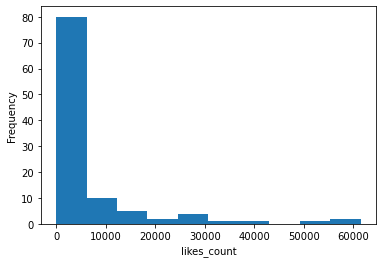

In [135]:
plt.xlabel('likes_count')
plt.ylabel('Number of Images')
median_column.plot(kind="hist")

In [136]:
testing_result["likes_count"] = testing_result["likes_count"].astype('int')

In [137]:
testing_result["likes_count"]

0       1134
1        417
2       3274
3       3116
4       4203
       ...  
101    19416
102    12539
103      301
104    12297
105    29729
Name: likes_count, Length: 106, dtype: int32

# Distribution of likes - Brand wise

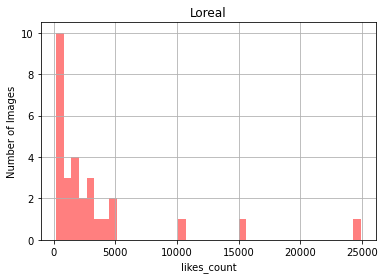

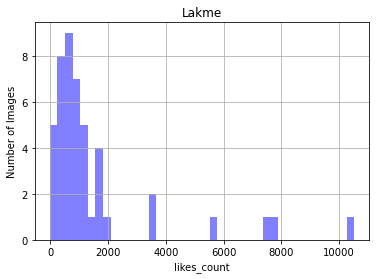

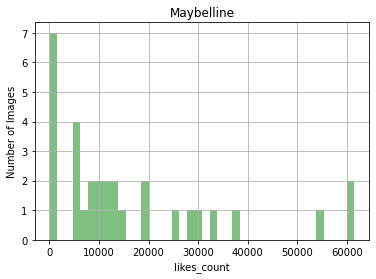

In [138]:
#live = preg[preg.outcome == 1]

Loreal = testing_result[testing_result.Predlabel == 0]
Lakme = testing_result[testing_result.Predlabel == 1]
Maybelline = testing_result[testing_result.Predlabel == 2]

#fig = plt.figure()
#ax1 = fig.add_subplot(111)
#plot the histogram for each brand using likes count on x-axis and number of images on y-axis
Loreal.hist(column = 'likes_count', bins = 40, histtype ='barstacked', color = 'red', \
           alpha = 0.5)
plt.xlabel('likes_count')
plt.ylabel('Number of Images')
plt.title('Loreal')
Lakme.hist(column = 'likes_count', bins = 40, histtype ='barstacked', color = 'blue', \
            alpha = 0.5)
plt.xlabel('likes_count')
plt.ylabel('Number of Images')
plt.title('Lakme')
Maybelline.hist(column = 'likes_count', bins = 40,histtype ='barstacked', color = 'green', \
            alpha = 0.5)
plt.xlabel('likes_count')
plt.ylabel('Number of Images')
plt.title('Maybelline')
plt.show()

# Taking Mean of likes with top 25 values for analysis

In [139]:
Loreal = Loreal.drop(['Predlabel'], axis=1)

In [140]:
Loreal= Loreal.astype('int')

In [141]:
Loreal = Loreal.nlargest(25,'likes_count')

In [142]:
Loreal= Loreal.rename(columns={'likes_count': "Loreal_likes"}, errors="raise")

In [143]:
#Lakme = Lakme.drop(['Predlabel'], axis=1)
Lakme= Lakme.astype('int')
Lakme = Lakme.nlargest(25,'likes_count')
Lakme= Lakme.rename(columns={'likes_count': "Lakme_likes"}, errors="raise")

In [144]:
#Maybelline = Maybelline.drop(['Predlabel'], axis=1)
Maybelline= Maybelline.astype('int')
Maybelline = Maybelline.nlargest(25,'likes_count')
Maybelline= Maybelline.rename(columns={'likes_count': "Maybelline_likes"}, errors="raise")

In [145]:
Mean_likes = pd.concat([Loreal,Lakme,Maybelline], axis=1)

In [146]:
Mean_likes = Mean_likes.drop(['Predlabel'],axis=1)
Mean_likes

,Loreal_likes,Lakme_likes,Maybelline_likes
0,1134.0,NaN,NaN
2,3274.0,NaN,NaN
3,3116.0,NaN,NaN
4,4203.0,NaN,NaN
5,15396.0,NaN,NaN
...,...,...,...
100,NaN,NaN,60603.0
101,NaN,NaN,19416.0
102,NaN,NaN,12539.0
104,NaN,NaN,12297.0


In [147]:
cols = ['Loreal_likes', 'Lakme_likes','Maybelline_likes']

In [148]:
Mean_likes[cols].mean()

Loreal_likes         3819.72
Lakme_likes          2459.00
Maybelline_likes    20029.56
dtype: float64

In [149]:
data_mean = pd.DataFrame(Mean_likes.mean(), columns=['mean_values'])

#create list of mean values
mean_lst = Mean_likes.mean().to_list

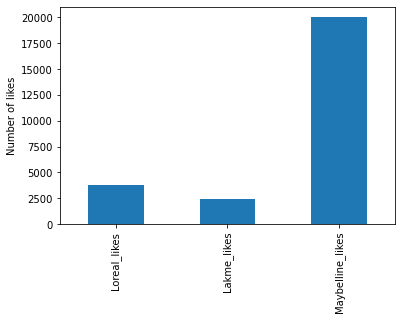

In [150]:
plt.ylabel('Number of likes')
Mean_likes.mean().plot(kind='bar');

# XGBOOST CV

In [151]:
# Load libraries
import os
import pandas as pd
import numpy as np
import math
import random
import collections
import timeit
import xgboost as xgb
import sklearn.metrics

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [152]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
parameters = { #when use hyperthread, xgboost may become slower
              #'objective': ['reg:squarederror'],
             'estimator__min_child_weight': [4],
              'estimator__learning_rate': [.03, 0.05, 0.1], #so called `eta` value
              'estimator__max_depth': [4, 5, 6],
              #'nthread': [4,5,6],
              'estimator__n_estimators': [500, 700, 1000],
              'estimator__eval_metric': ['rmse']
              }


In [153]:
xgb1 = MultiOutputRegressor(XGBRegressor())

In [154]:
xgb1.get_params()

{'estimator__objective': 'reg:squarederror',
 'estimator__base_score': None,
 'estimator__booster': None,
 'estimator__callbacks': None,
 'estimator__colsample_bylevel': None,
 'estimator__colsample_bynode': None,
 'estimator__colsample_bytree': None,
 'estimator__early_stopping_rounds': None,
 'estimator__enable_categorical': False,
 'estimator__eval_metric': None,
 'estimator__gamma': None,
 'estimator__gpu_id': None,
 'estimator__grow_policy': None,
 'estimator__importance_type': None,
 'estimator__interaction_constraints': None,
 'estimator__learning_rate': None,
 'estimator__max_bin': None,
 'estimator__max_cat_to_onehot': None,
 'estimator__max_delta_step': None,
 'estimator__max_depth': None,
 'estimator__max_leaves': None,
 'estimator__min_child_weight': None,
 'estimator__missing': nan,
 'estimator__monotone_constraints': None,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__num_parallel_tree': None,
 'estimator__predictor': None,
 'estimator__random_

In [155]:
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 1,
                        verbose=True)

In [156]:
xgb_grid.fit(X_train,Y_train)

Fitting 2 folds for each of 27 candidates, totalling 54 fits


GridSearchCV(cv=2,
             estimator=MultiOutputRegressor(estimator=XGBRegressor(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   early_stopping_rounds=None,
                                                                   enable_categorical=False,
                                                                   eval_metric=None,
                                                                   gamma=None,
                                                                   gpu_id=None,
                              

In [157]:
# Make prediction.
ypred = xgb_grid.predict(X_test)

# Compute RMSE on test set.
mse_xgboost = mean_squared_error(Y_test, ypred)
rmse_xgboost = math.sqrt(mse_xgboost)

print('RMSE with XGBoost', rmse_xgboost)

RMSE with XGBoost 0.039527120489259944


# XGBOOST REGRESSOR

In [158]:
# Load libraries
import os
import pandas as pd
import numpy as np
import math
import random
import collections
import timeit
import xgboost as xgb
import sklearn.metrics

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [159]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
parameters = { #when use hyperthread, xgboost may become slower
              #'objective': ['reg:squarederror'],
             'estimator__min_child_weight': [10,20],
              'estimator__learning_rate': [.01, 0.08, 0.2], #so called `eta` value
              'estimator__max_depth': [3,5,9],
              #'nthread': [4,5,6],
              'estimator__n_estimators': [200, 300, 700],
              'estimator__eval_metric': ['rmse']
              }


In [160]:
xgb1 = MultiOutputRegressor(XGBRegressor())
xgb1.get_params()

{'estimator__objective': 'reg:squarederror',
 'estimator__base_score': None,
 'estimator__booster': None,
 'estimator__callbacks': None,
 'estimator__colsample_bylevel': None,
 'estimator__colsample_bynode': None,
 'estimator__colsample_bytree': None,
 'estimator__early_stopping_rounds': None,
 'estimator__enable_categorical': False,
 'estimator__eval_metric': None,
 'estimator__gamma': None,
 'estimator__gpu_id': None,
 'estimator__grow_policy': None,
 'estimator__importance_type': None,
 'estimator__interaction_constraints': None,
 'estimator__learning_rate': None,
 'estimator__max_bin': None,
 'estimator__max_cat_to_onehot': None,
 'estimator__max_delta_step': None,
 'estimator__max_depth': None,
 'estimator__max_leaves': None,
 'estimator__min_child_weight': None,
 'estimator__missing': nan,
 'estimator__monotone_constraints': None,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__num_parallel_tree': None,
 'estimator__predictor': None,
 'estimator__random_

In [161]:
#Apply GridSearchCV for better hyperparameter tuning
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = 1,
                        verbose=True)

In [162]:
xgb_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=MultiOutputRegressor(estimator=XGBRegressor(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   early_stopping_rounds=None,
                                                                   enable_categorical=False,
                                                                   eval_metric=None,
                                                                   gamma=None,
                                                                   gpu_id=None,
                              

In [163]:
# Make prediction.
ypred = xgb_grid.predict(X_test)

# Compute RMSE on test set.
mse_xgboost = mean_squared_error(Y_test, ypred)
rmse_xgboost = math.sqrt(mse_xgboost)

print('RMSE with XGBoost', rmse_xgboost)

RMSE with XGBoost 0.07763258140995713


# SVR REGRESSION

In [164]:
#import libraries
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

In [165]:
# Create the SVR regressor
svr = SVR(epsilon=0.2)

In [166]:
# Create the Multioutput Regressor
mor = MultiOutputRegressor(svr)

In [167]:
# Train the regressor
mor = mor.fit(X_train, Y_train)

In [168]:
# Generate predictions for testing data
y_pred = mor.predict(X_test)

In [169]:
# compute the mean squared error
mse_one = mean_squared_error(Y_test, y_pred)

In [170]:
# compute the root mean squared error
SVRN_rmse = math.sqrt(mse_one)

In [171]:
print(SVRN_rmse)

0.36434523191586493


# Linear Regression

In [172]:
#import the libraries
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn.linear_model import LinearRegression

#Use multioutput regressor on top of linear regression for multioutput 
multi_output_reg = MultiOutputRegressor(LinearRegression())
multi_reg = multi_output_reg.fit(X_train, Y_train) #train the dataset
Pred_LR = multi_reg.predict(X_test) #predict on validation/test dataset
mse_LR = mean_squared_error(Y_test, Pred_LR)
rmse_LR = math.sqrt(mse_LR)
print(rmse_LR)

0.4750498829910538


In [173]:
# # Compute RMSE on test set.
# mse_SVR = mean_squared_error(Y_test, ypred_SVR)
# rmse_SVR = math.sqrt(mse_knn)

In [174]:
# print(rmse_SVR)

# Random Forest Regression

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their average  for regression.
Random State: The random number seed so that 
- same random numbers are generated every time.
- This is important for parameter tuning. If we don’t fix the random number, then we’ll have different outcomes for subsequent runs on the same parameters and it becomes difficult to compare models.


In [175]:
#import the libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [176]:
params = {
    'estimator__max_depth': [2,3,5,10,20],
    'estimator__min_samples_leaf': [5,10,20,50,100,200],
    'estimator__n_estimators': [10,25,30,50,100,200]
}

In [177]:
rf = RandomForestRegressor(random_state=42)

In [178]:
clf = MultiOutputRegressor(rf)

In [179]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1)

In [180]:
#training of dataset
grid_search.fit(X_train, Y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4,
             estimator=MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42)),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [2, 3, 5, 10, 20],
                         'estimator__min_samples_leaf': [5, 10, 20, 50, 100,
                                                         200],
                         'estimator__n_estimators': [10, 25, 30, 50, 100, 200]},
             verbose=1)

In [181]:
#predict the target on validation/test dataset
ypred_RF = grid_search.predict(X_test)

In [182]:
# Compute RMSE on test set.
mse_knn = mean_squared_error(Y_test, ypred_RF)
rmse_knn = math.sqrt(mse_knn)

In [183]:
print(rmse_knn) #print the rmse value

0.3294523546121157
